<a href="https://colab.research.google.com/github/merma1509/ClimateInsights/blob/main/ClimateInsightsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Needed Libraries

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

### Features Descriptions



```
*   Temperature: Average temperature measurements in Celsius.
*   Sea Level Rise: Measured sea level rise in millimeters.
*   CO2 Emissions: Levels of carbon dioxide emissions in parts per million (ppm).
*   Precipitation: Rainfall amounts in millimeters.
*   Humidity: Relative humidity in percentage.
*   Wind Speed: Wind speed in kilometers per hour.
```



### Data Preparation, Manipulation and EDA Analysis

In [78]:
# Read our data sets 'climate_change_data.csv' and first five rows
df = pd.read_csv('climate_change_data.csv')
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


As we see, we don't have the missing values in our dataset

### Summary Of Our Dataset

In [4]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [79]:
# Convert Date column to the standard dates in pandas
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [80]:
# Fonts, plot styles
sns.set_style('darkgrid')
font = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 14

}
plt.rc('font', **font)

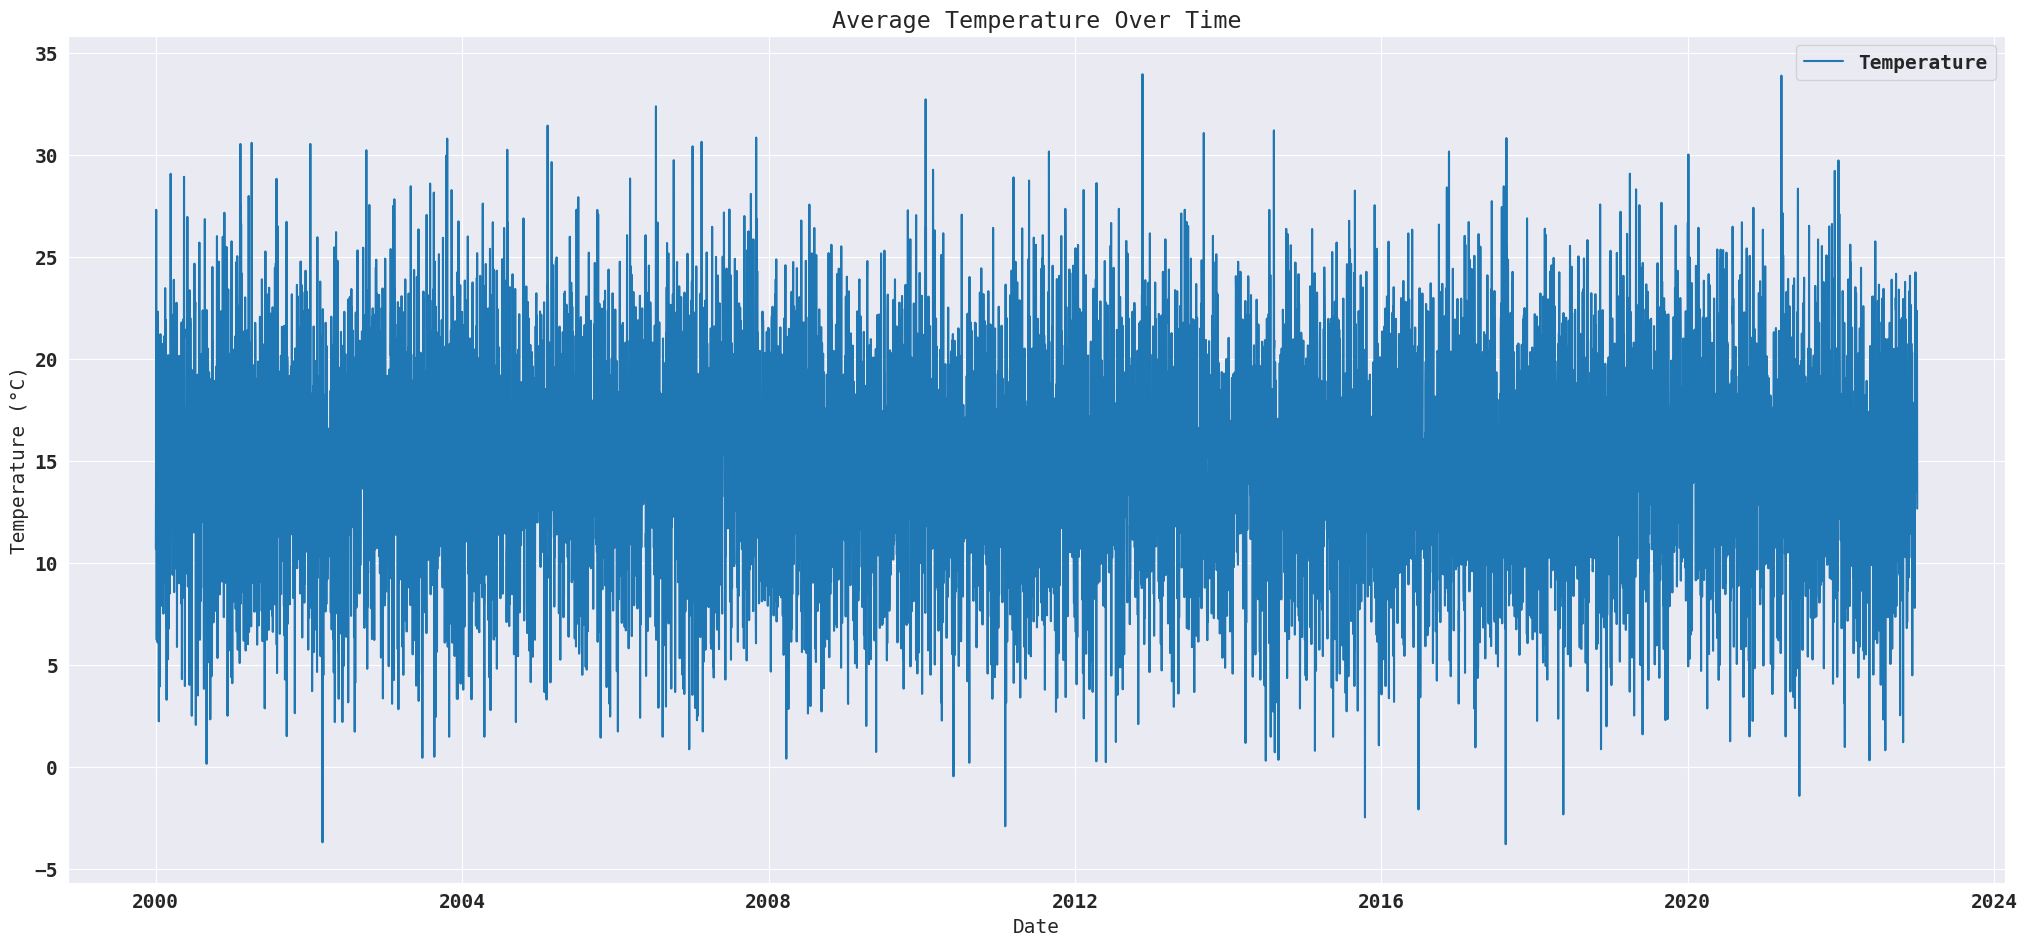

In [81]:
# Plot Average Temperature Over Time
plt.figure(figsize=(25, 11))
plt.plot(df['Date'], df['Temperature'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.legend()
plt.show()

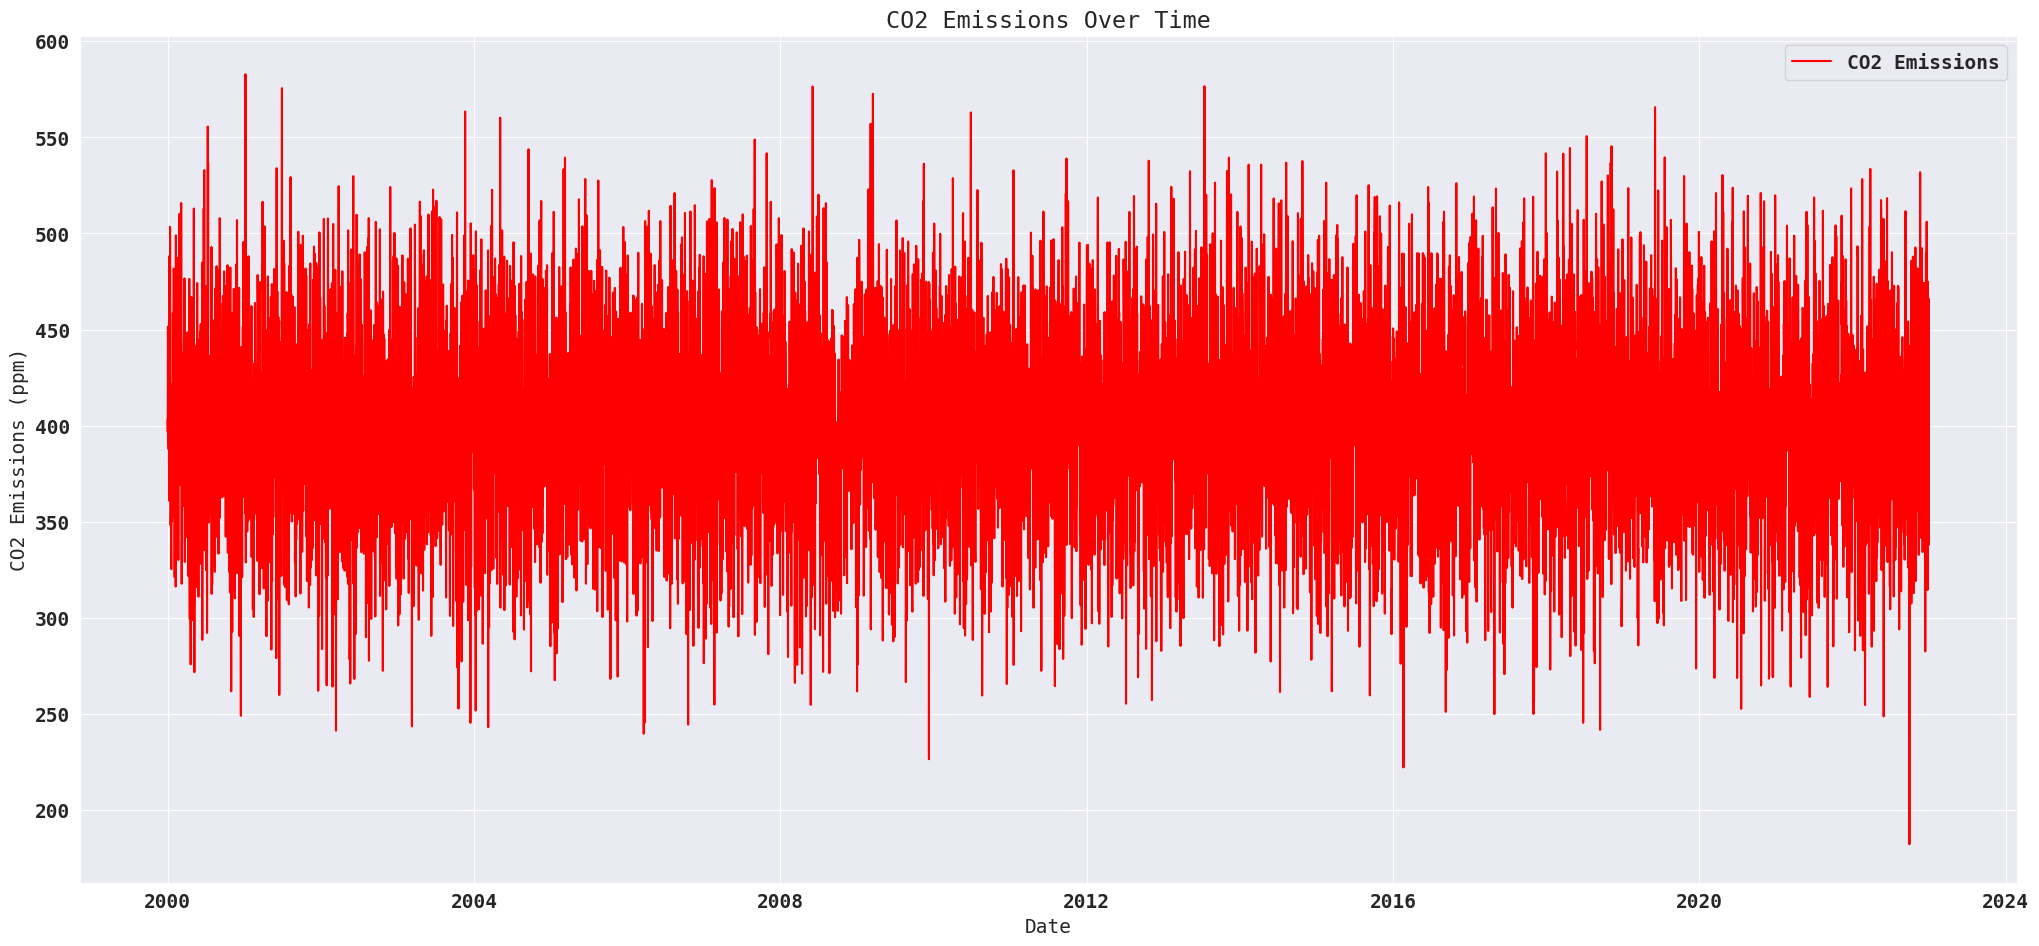

In [8]:
# Plot CO2 Emissions over time
plt.figure(figsize=(25, 11))
plt.plot(df['Date'], df['CO2 Emissions'], label='CO2 Emissions', color='red')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions (ppm)')
plt.title('CO2 Emissions Over Time')
plt.legend()
plt.show()

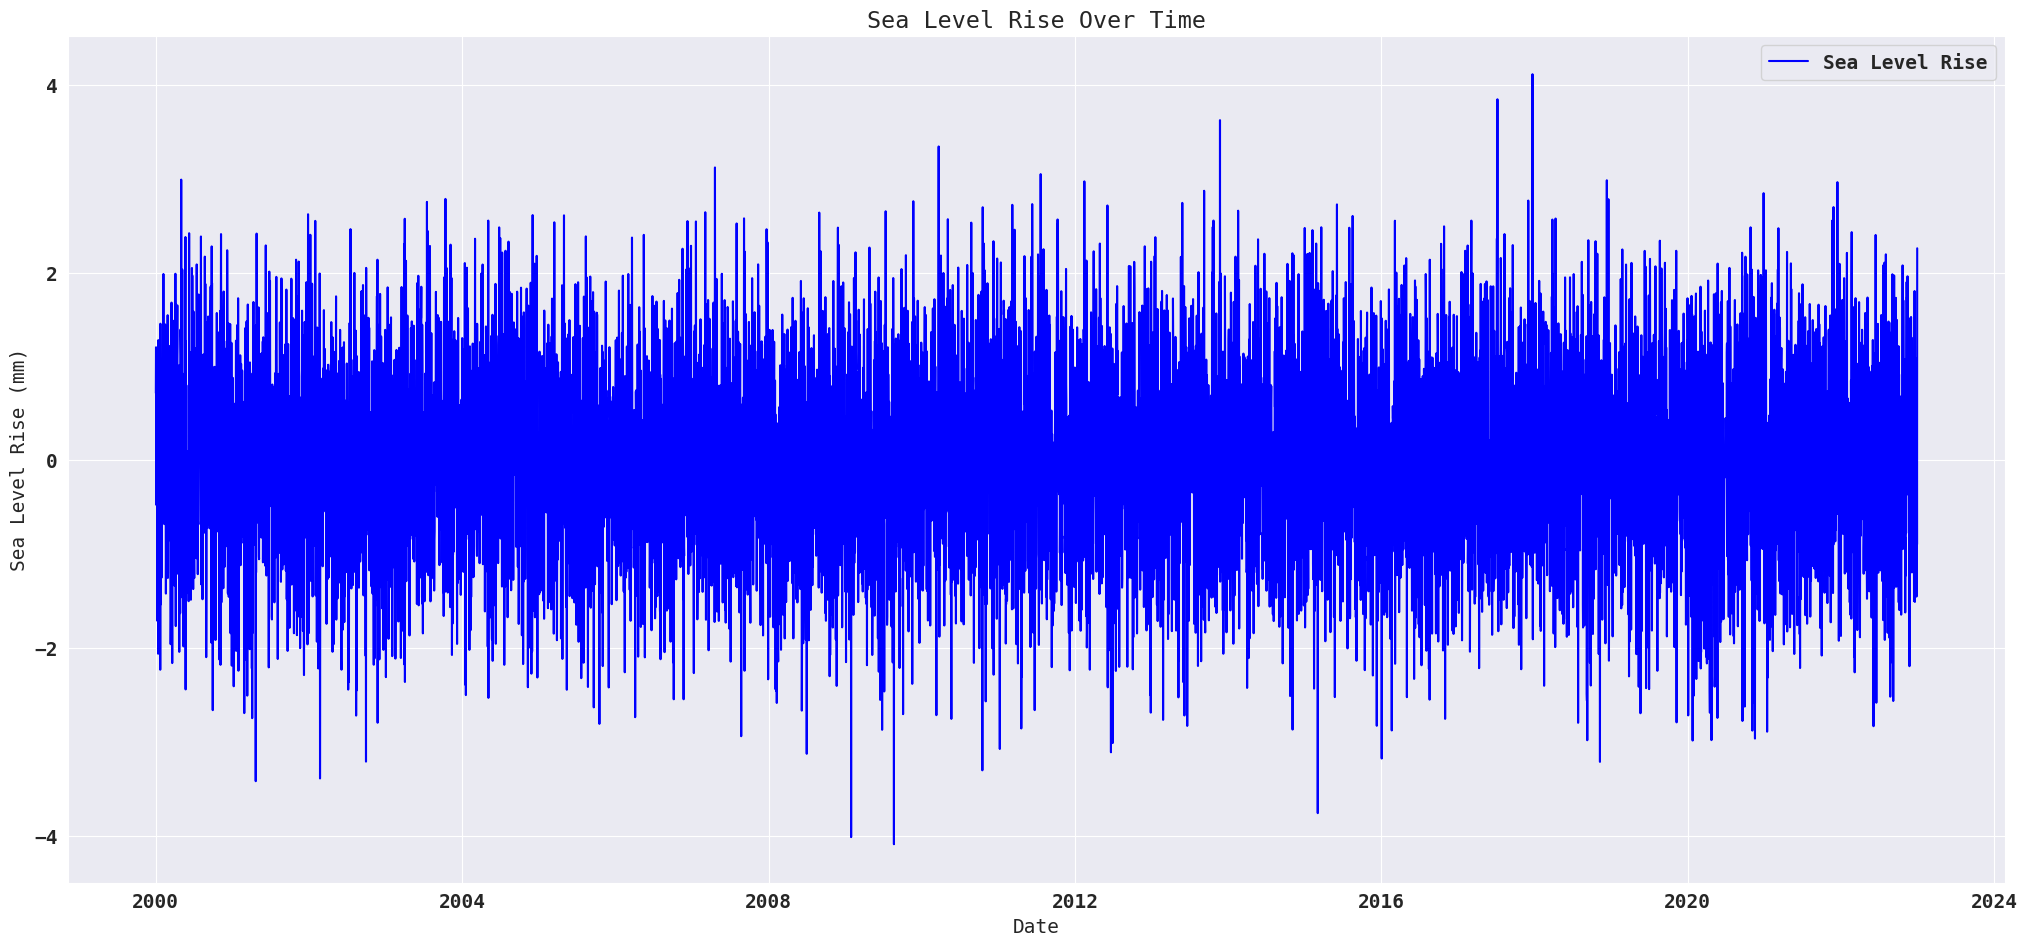

In [15]:
# Plot sea level rise over time
plt.figure(figsize=(25, 11))
sns.lineplot(x='Date', y='Sea Level Rise', data=df,label='Sea Level Rise', color='blue')
plt.xlabel('Date')
plt.ylabel('Sea Level Rise (mm)')
plt.title('Sea Level Rise Over Time')
plt.legend()
plt.show()

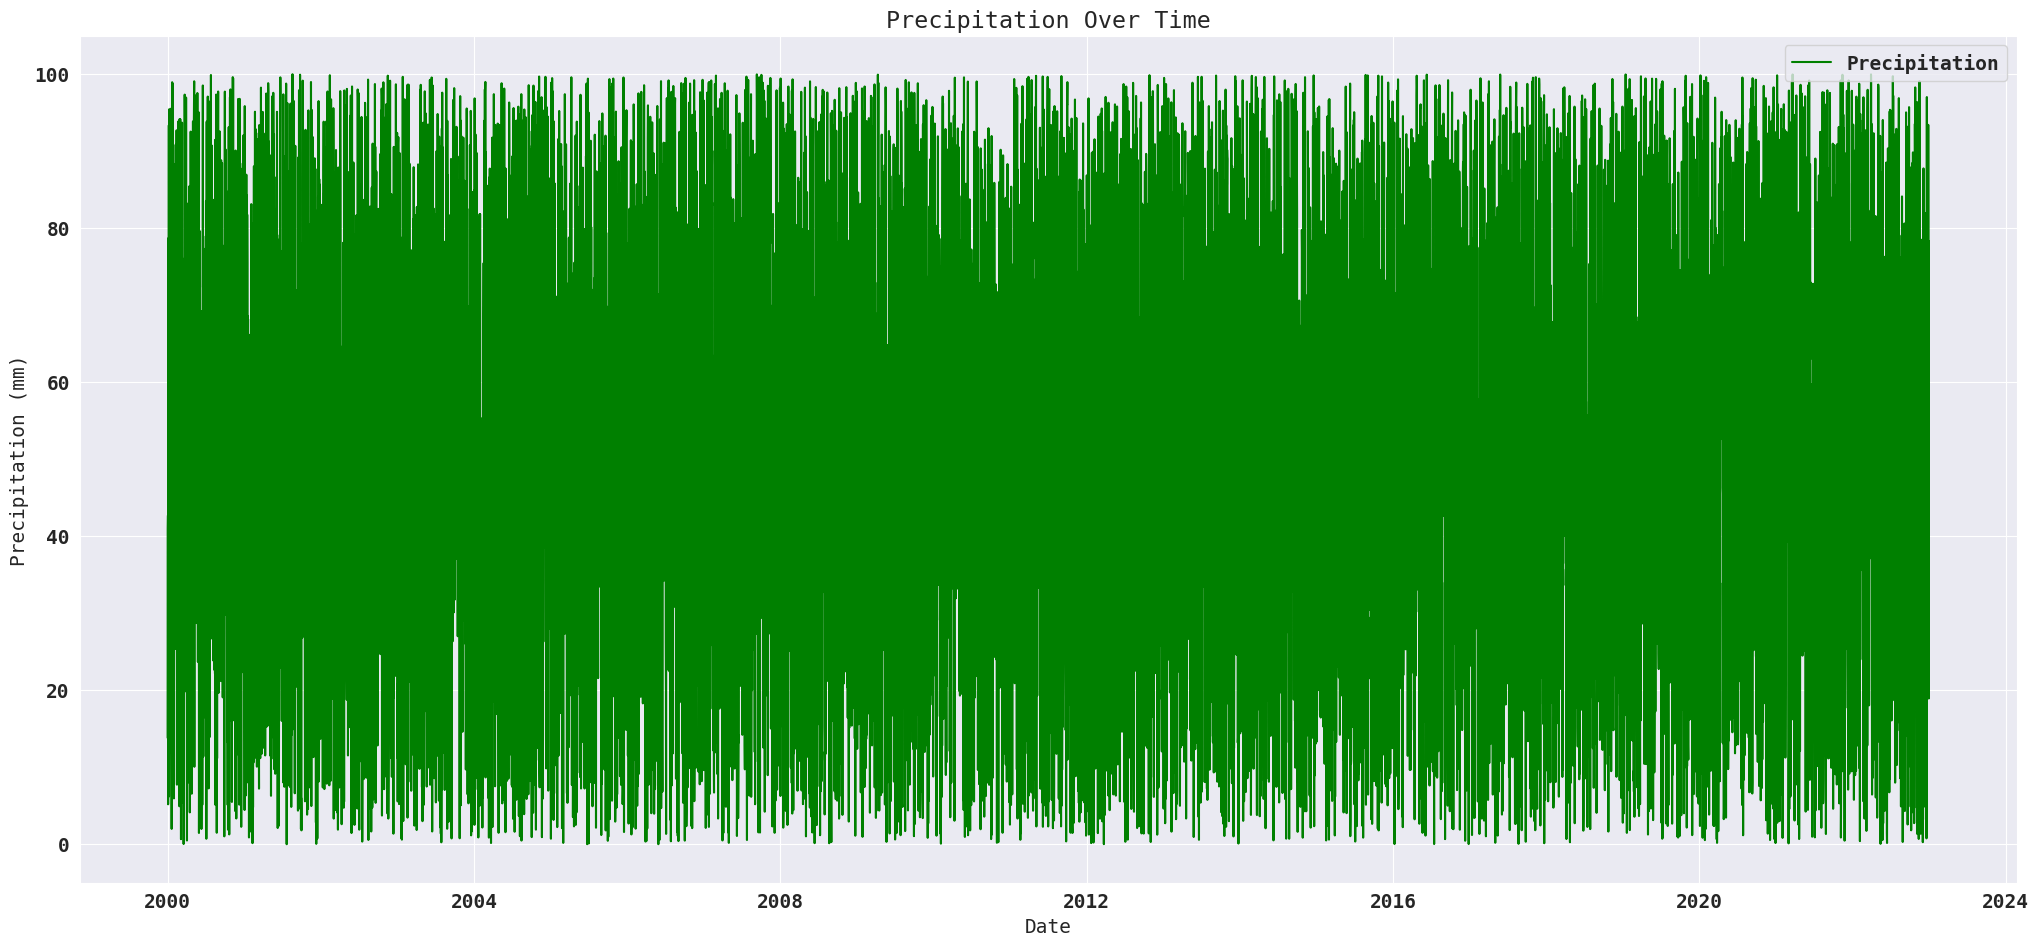

In [16]:
# Plot precipitation over time
plt.figure(figsize=(25, 11))
plt.plot(df['Date'], df['Precipitation'], label='Precipitation', color='green')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time')
plt.legend()
plt.show()

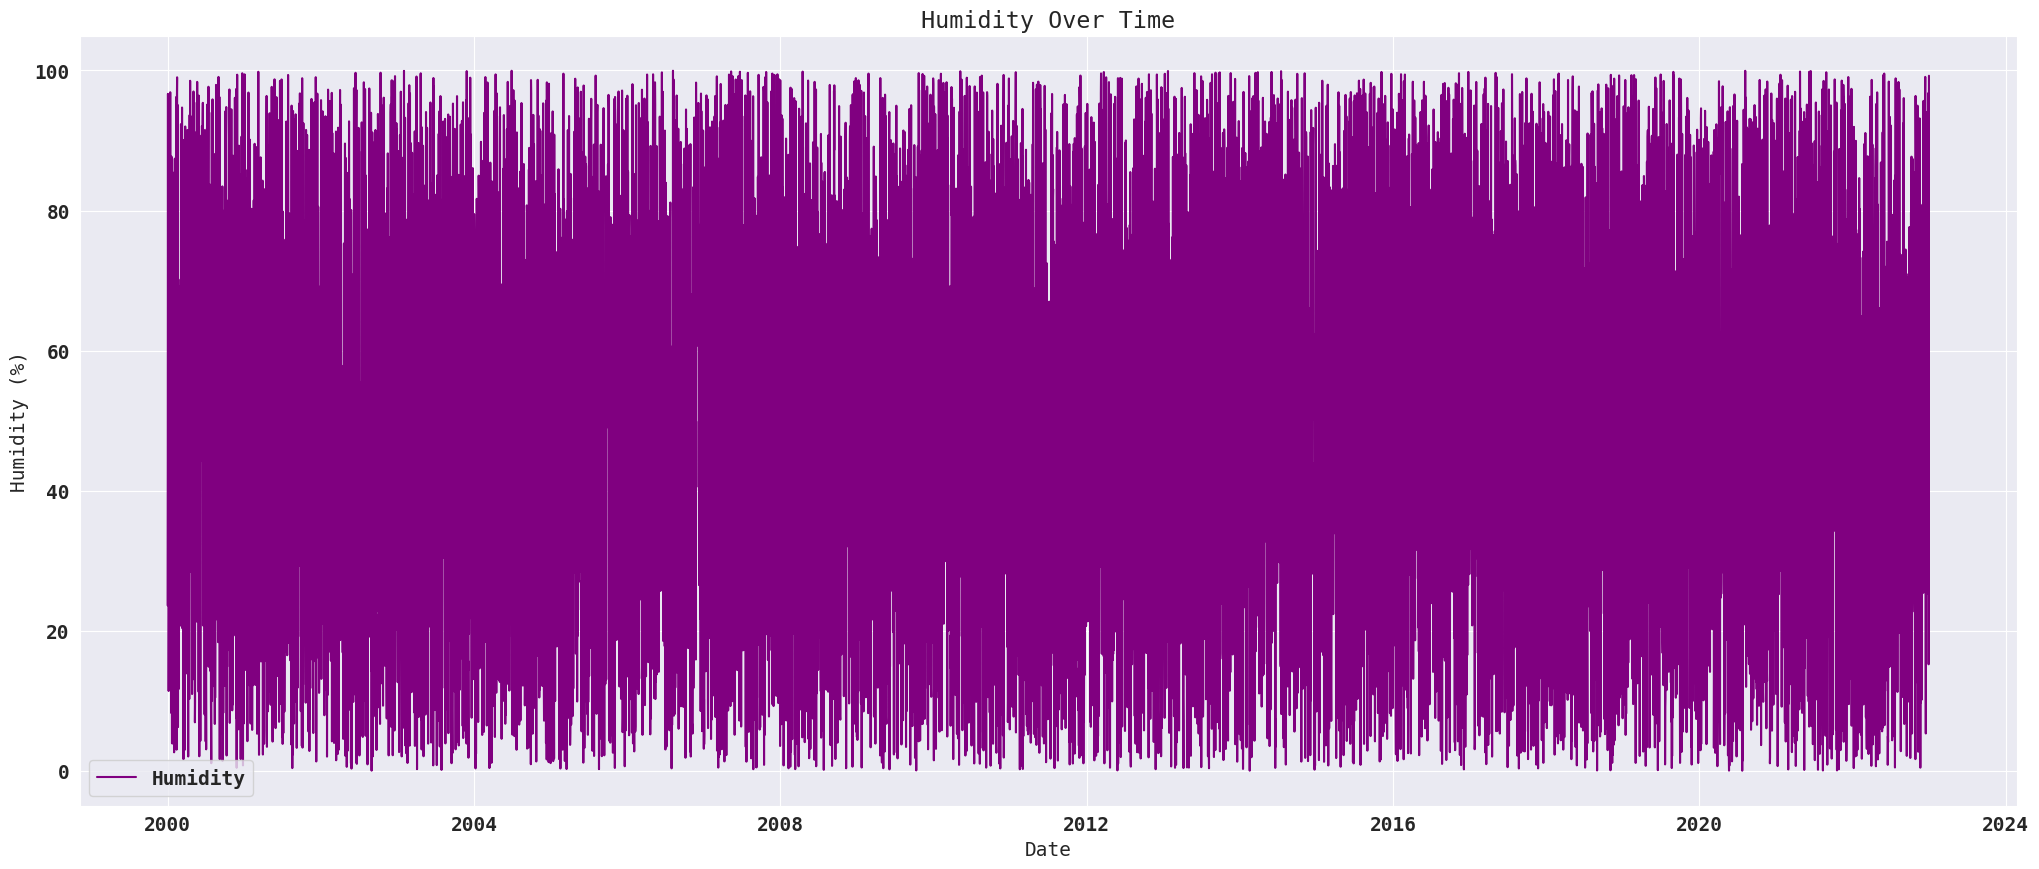

In [18]:
# Plot humidity over time
plt.figure(figsize=(25, 10))
plt.plot(df['Date'], df['Humidity'], label='Humidity', color='purple')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.legend()
plt.show()

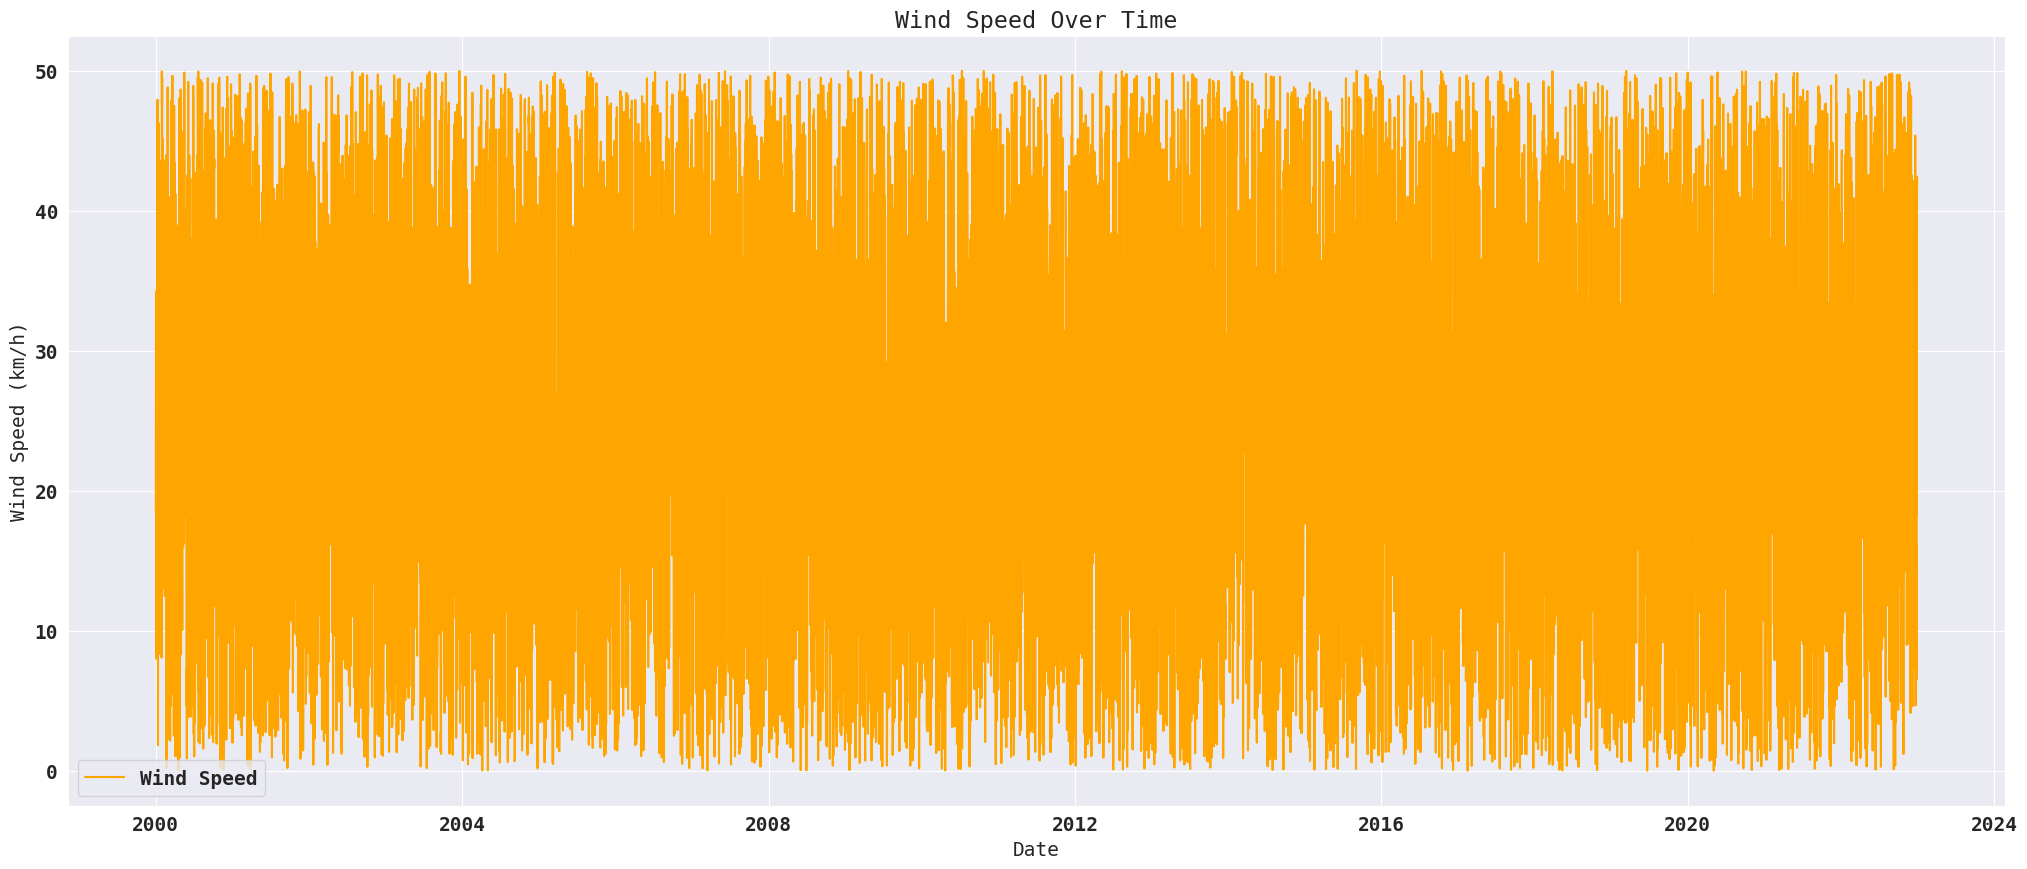

In [19]:
# Plot wind speed over time
plt.figure(figsize=(25, 10))
plt.plot(df['Date'], df['Wind Speed'], label='Wind Speed', color='orange')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Over Time')
plt.legend()
plt.show()


# Correlation Analysis and Heatmap
```
Where The Positive Correlation Between Two Variables Shows That When One Variable Increases, and the Other Also Increases.
The Negative shows when the first increases the second decreases.and Otherwise No Correlation
```

In [31]:
# Let's Calculate the Correlation Matrix, So We ca see the relationship Between Features
corr_matrix = df.select_dtypes(exclude='object').corr()
corr_matrix

,Date,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,1.000000,-0.008057,-0.006976,-0.001660,-0.005001,0.005974,-0.006248
Temperature,-0.008057,1.000000,-0.002775,0.011663,0.004916,-0.015737,0.021779
CO2 Emissions,-0.006976,-0.002775,1.000000,-0.004751,-0.007443,-0.003661,-0.003990
Sea Level Rise,-0.001660,0.011663,-0.004751,1.000000,-0.000249,-0.007610,0.011789
Precipitation,-0.005001,0.004916,-0.007443,-0.000249,1.000000,0.003732,-0.018798
Humidity,0.005974,-0.015737,-0.003661,-0.007610,0.003732,1.000000,0.028591
Wind Speed,-0.006248,0.021779,-0.003990,0.011789,-0.018798,0.028591,1.000000


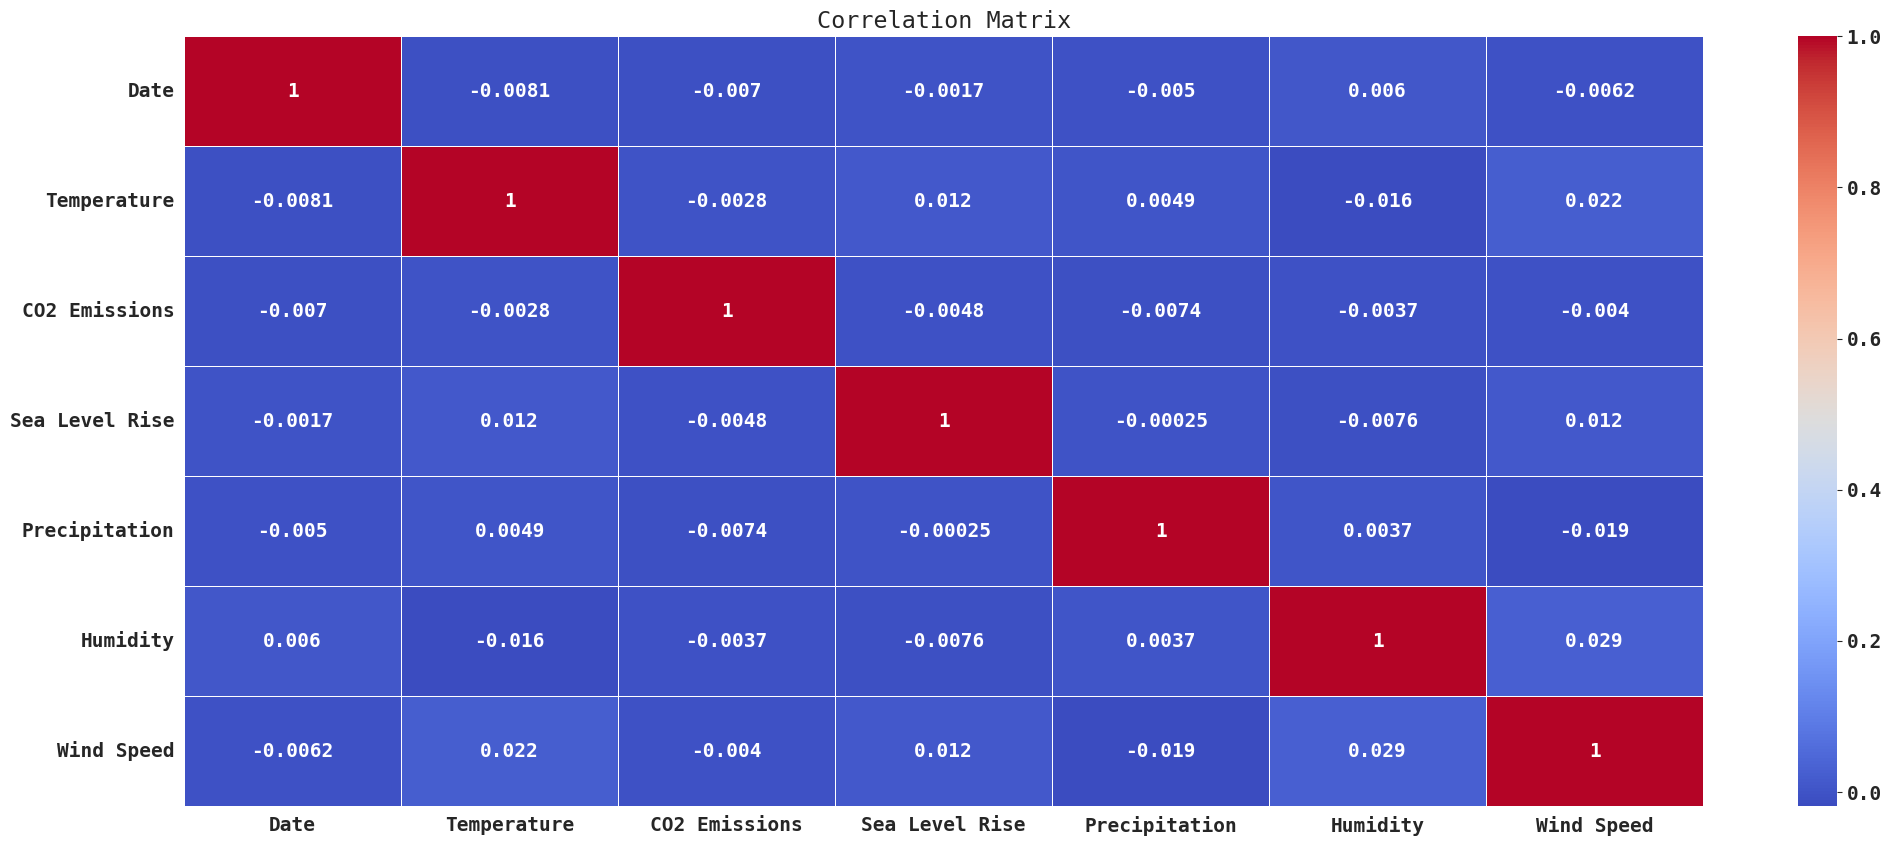

In [39]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(24.5, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We want to predict Temperature measurements from 2000 to 2022, As we see there is positive colleration between temperature with Wind Speed, See Level Rise, and Precipitation. This means that as Temperature increases, those three features (Wind Speed, Preciitation, and Sea Level Rise also Increases).

We also have Negative Colleration between Temperature and Date, C02 Emissions, and Humidity. This means that as Temperature increases, these three features (Humidity, Date, CO2 Emissions decreases). And No colleration Temperature within itself.

## Model Building And Models Comparizons To Check Which Model is Good For Us

In [82]:
# Predicting temperature based on CO2 emissions, sea level rise, precipitation, humidity, and wind speed
X = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']]
y = df['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Models

Linear Regression Performance:
MAE: 4.09098
MSE: 25.75564
R^2 Score: -0.00021



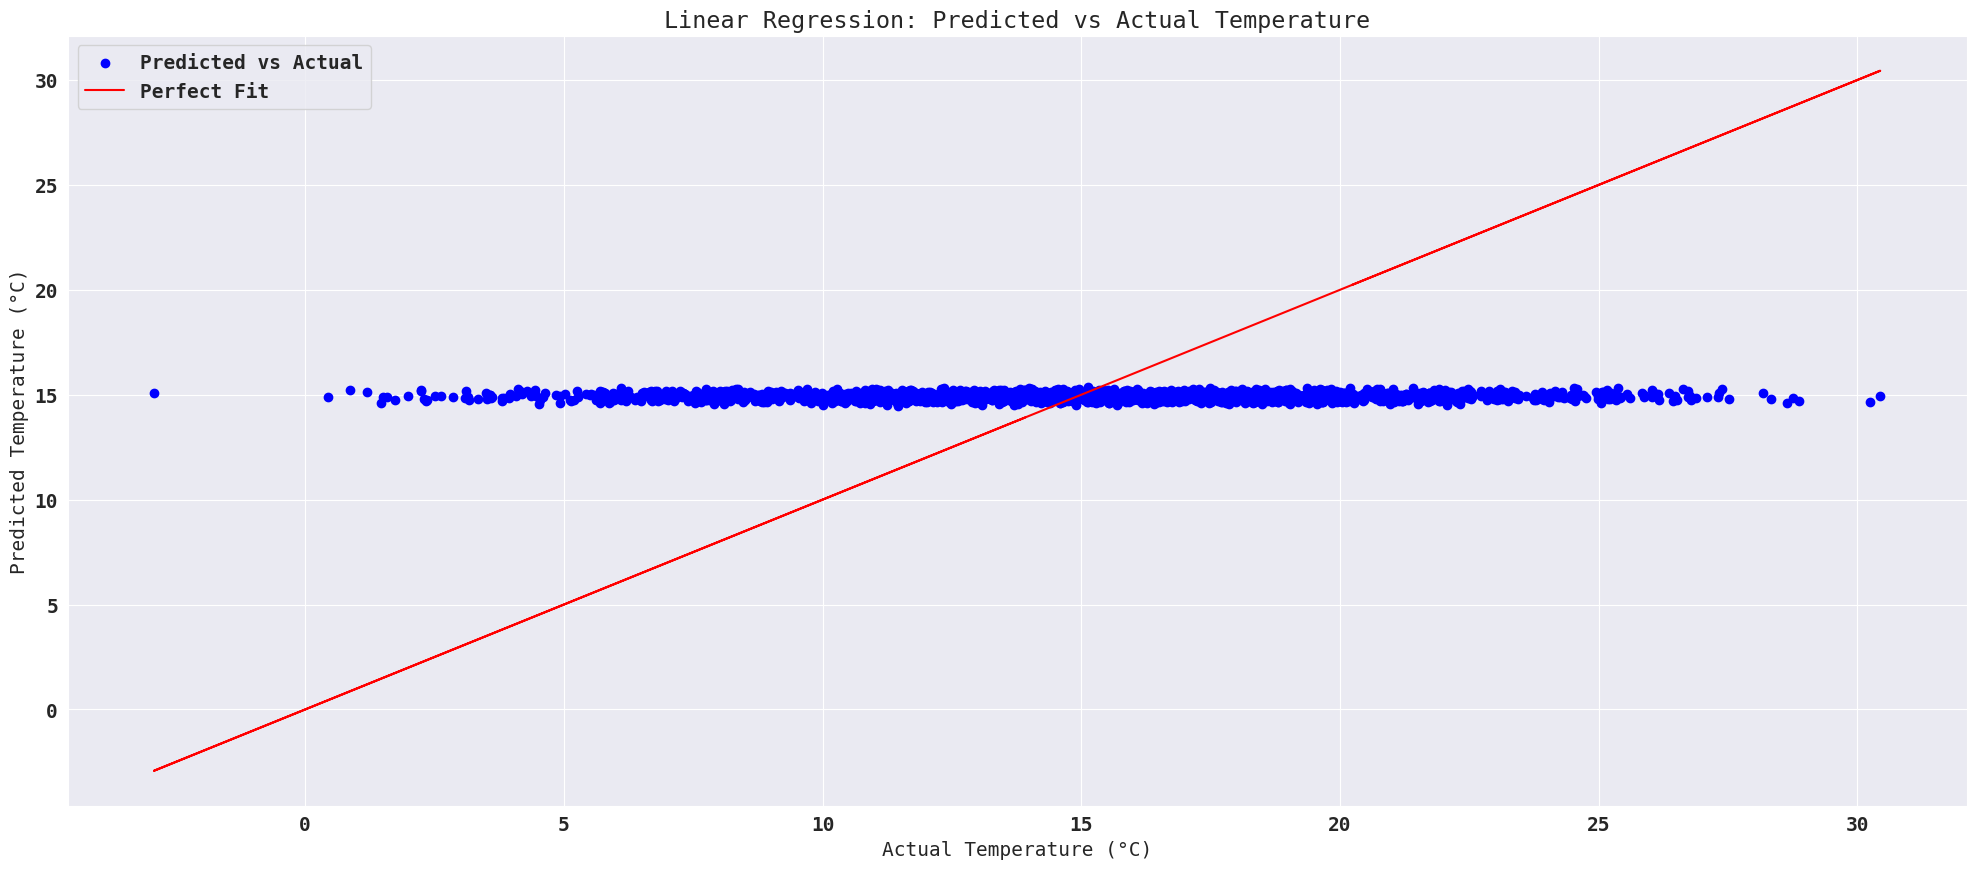

In [83]:
# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.5f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.5f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.5f}\n")

# Plot Predictions vs Actual Values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Linear Regression: Predicted vs Actual Temperature')
plt.legend()
plt.show()

### Decision Tree Models

Decision Tree Regressor Performance:
MAE: 5.86358
MSE: 53.17716
R^2 Score: -1.06511



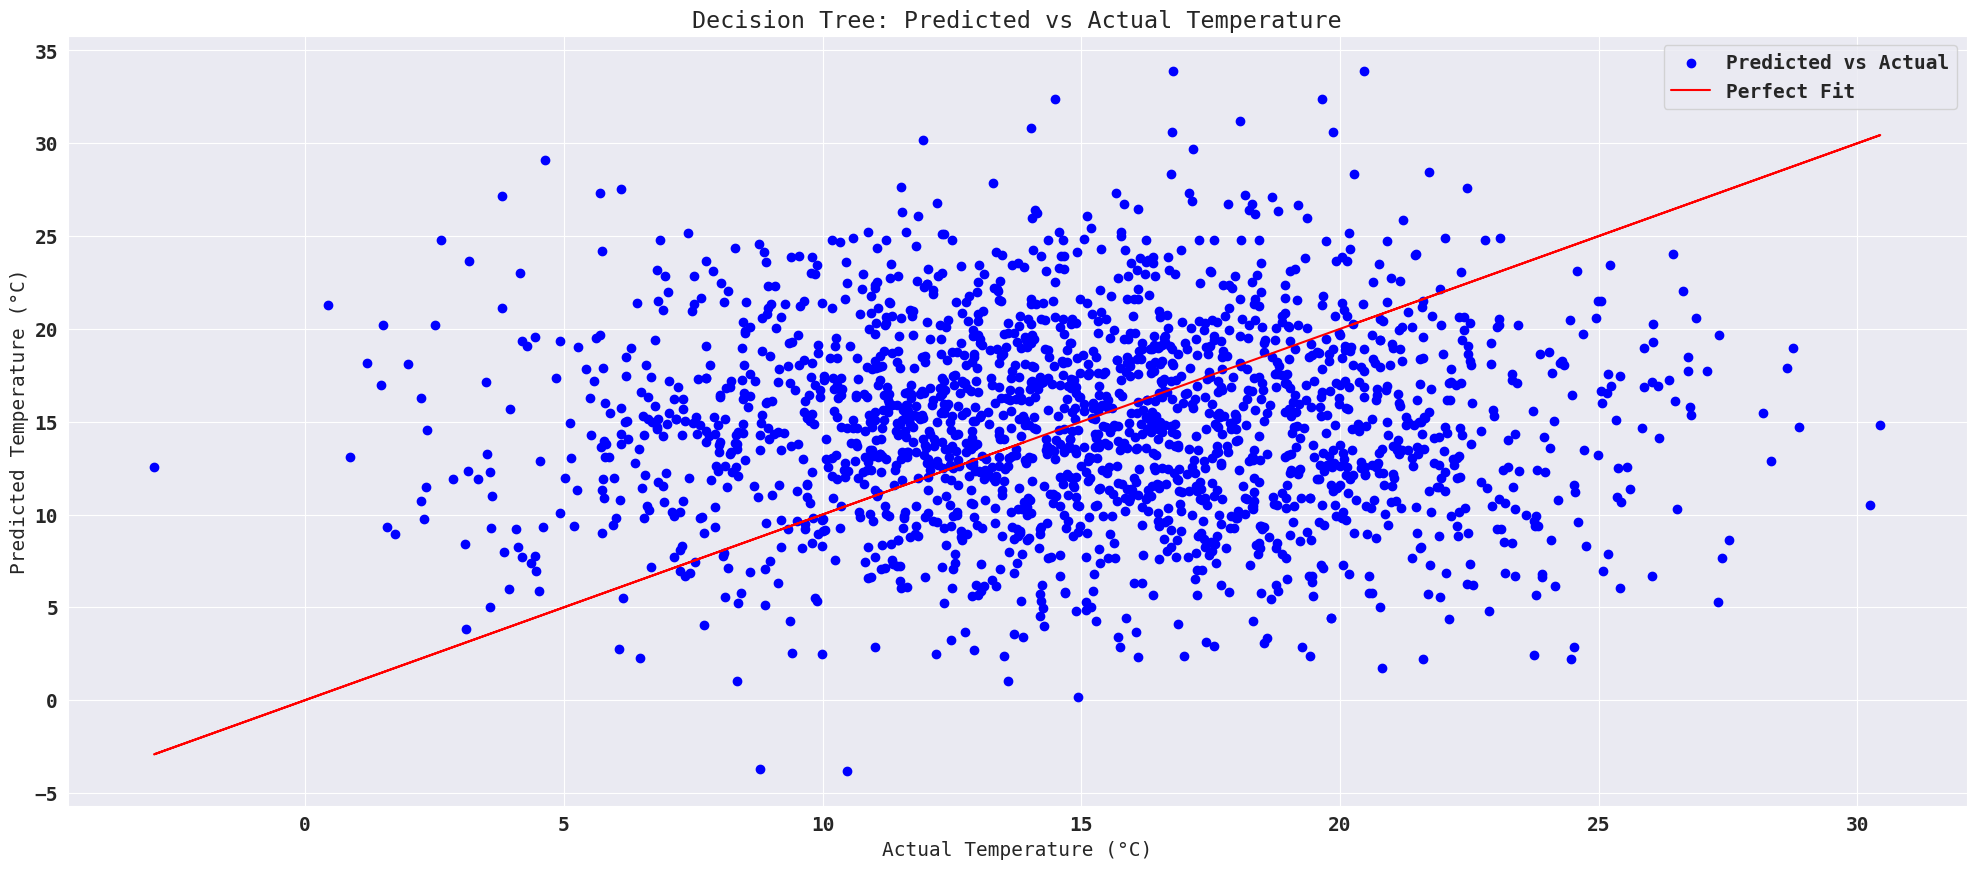

In [84]:
# Create and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Performance:")
print("MAE: {:.5f}".format(mean_absolute_error(y_test, y_pred_tree)))
print("MSE: {:.5f}".format(mean_squared_error(y_test, y_pred_tree)))
print("R^2 Score: {:.5f}\n".format(r2_score(y_test, y_pred_tree)))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_test, y_pred_tree, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Decision Tree: Predicted vs Actual Temperature')
plt.legend()
plt.show()


### Random Forest Models

Random Forest Regressor Performance:
MAE: 4.16653
MSE: 26.75474
R^2 Score: -0.03901



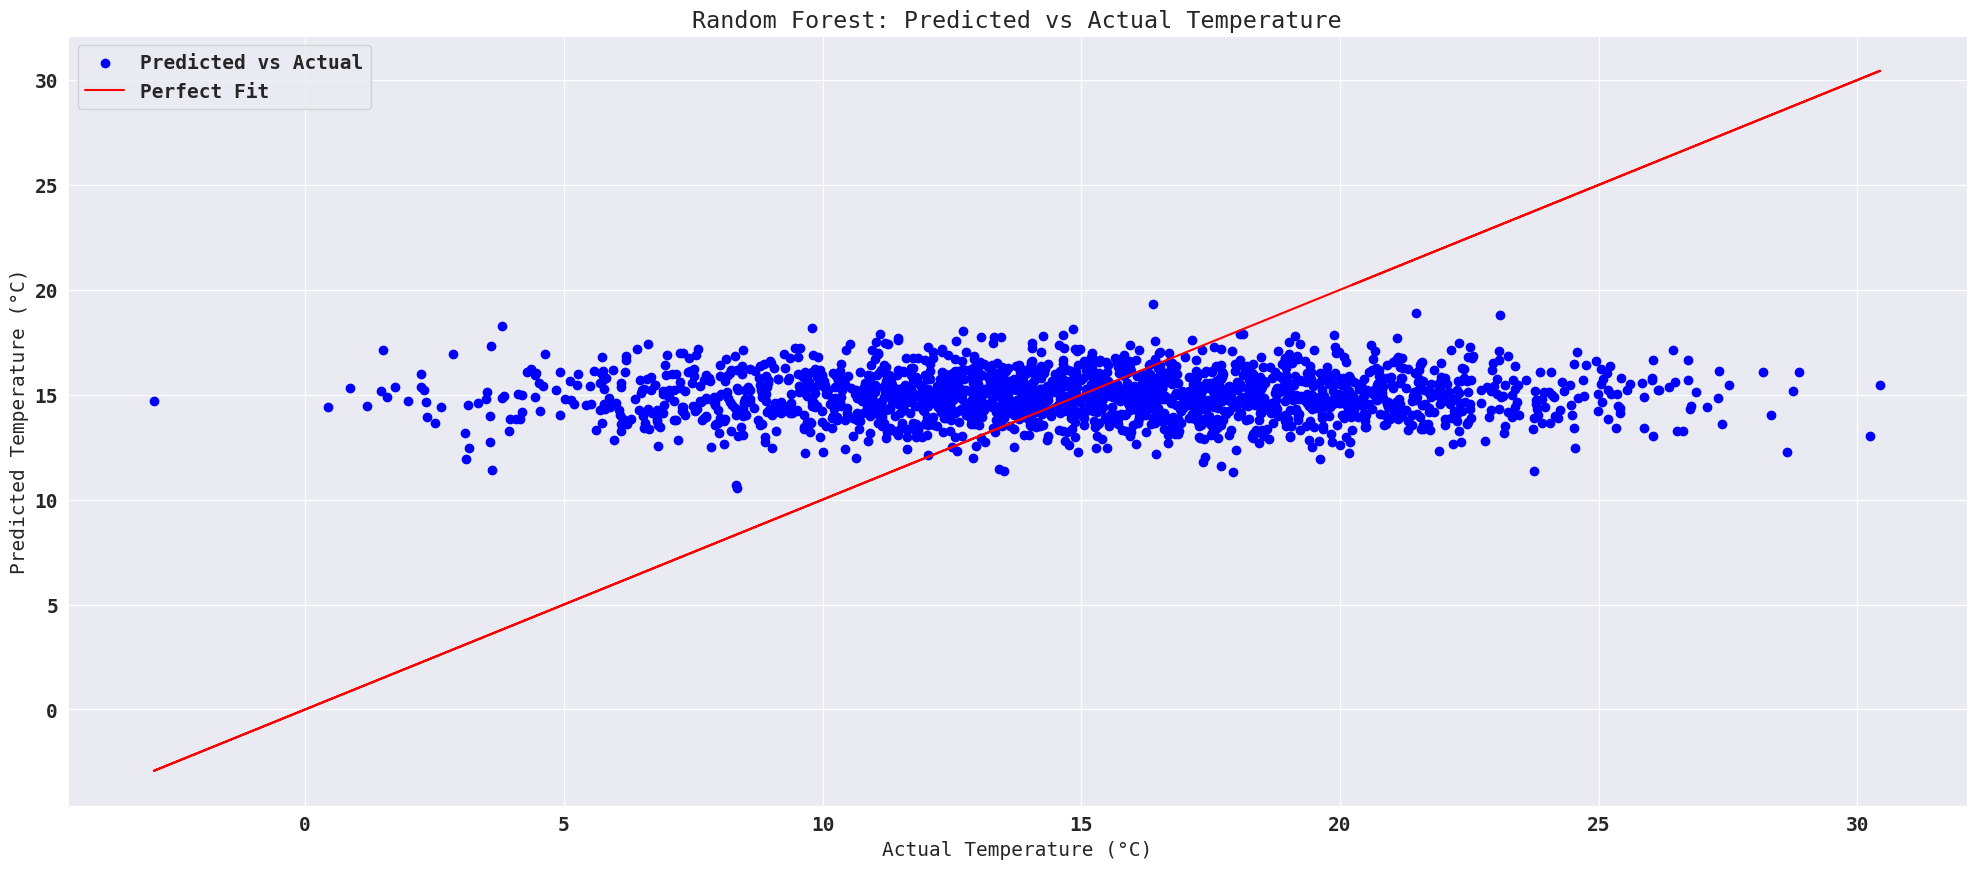

In [85]:
# Create and train the model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Performance:")
print("MAE: {:.5f}".format(mean_absolute_error(y_test, y_pred_forest)))
print("MSE: {:.5f}".format(mean_squared_error(y_test, y_pred_forest)))
print("R^2 Score: {:.5f}\n".format(r2_score(y_test, y_pred_forest)))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_test, y_pred_forest, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Random Forest: Predicted vs Actual Temperature')
plt.legend()
plt.show()


In [86]:
# Compare performance metrics along Different Models and the model with low mae, mse, nd positive R^2 Score is the best fit
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae = [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_tree), mean_absolute_error(y_test, y_pred_forest)]
mse = [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_forest)]
r2 = [r2_score(y_test, y_pred), r2_score(y_test, y_pred_tree), r2_score(y_test, y_pred_forest)]

comparison_df = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'MSE': mse,
    'R^2 Score': r2
})

print(comparison_df)


               Model       MAE        MSE  R^2 Score
0  Linear Regression  4.090983  25.755635  -0.000210
1      Decision Tree  5.863577  53.177162  -1.065115
2      Random Forest  4.166531  26.754743  -0.039010


## Comparization With Visualizations

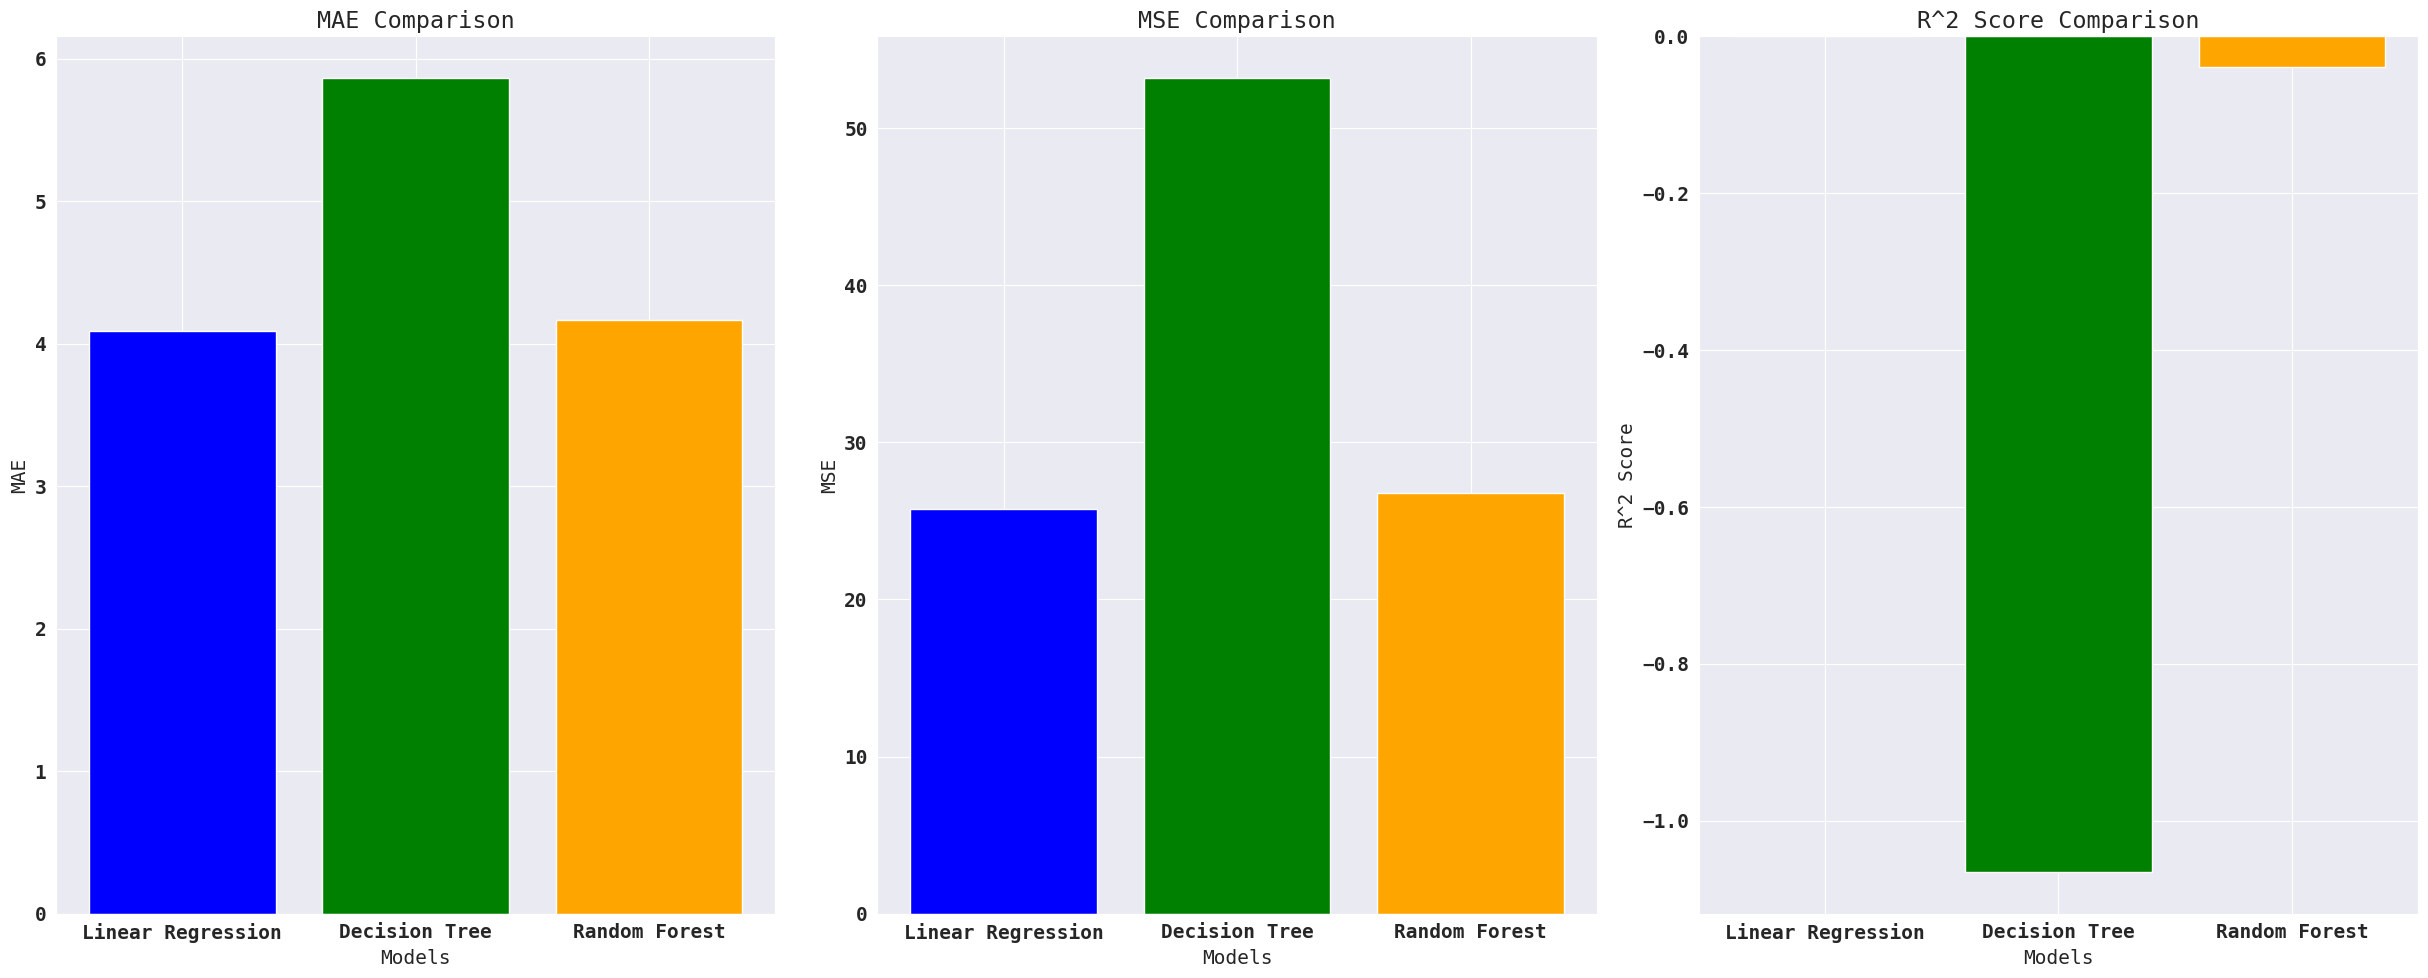

In [92]:
# Visualize comparisons
plt.figure(figsize=(24.5, 10))

# MAE Comparison
plt.subplot(1, 3, 1)
plt.bar(models, mae, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison')

# MSE Comparison
plt.subplot(1, 3, 2)
plt.bar(models, mse, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison')

# R^2 Score Comparison
plt.subplot(1, 3, 3)
plt.bar(models, r2, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')

plt.tight_layout()
plt.show()

### Normalization and Standardization, So our comparizos will have the same scale

       MAE       MSE  R^2 Score
0  0.00000  0.000000   1.000000
1  1.00000  1.000000   0.000000
2  0.04262  0.036435   0.963565


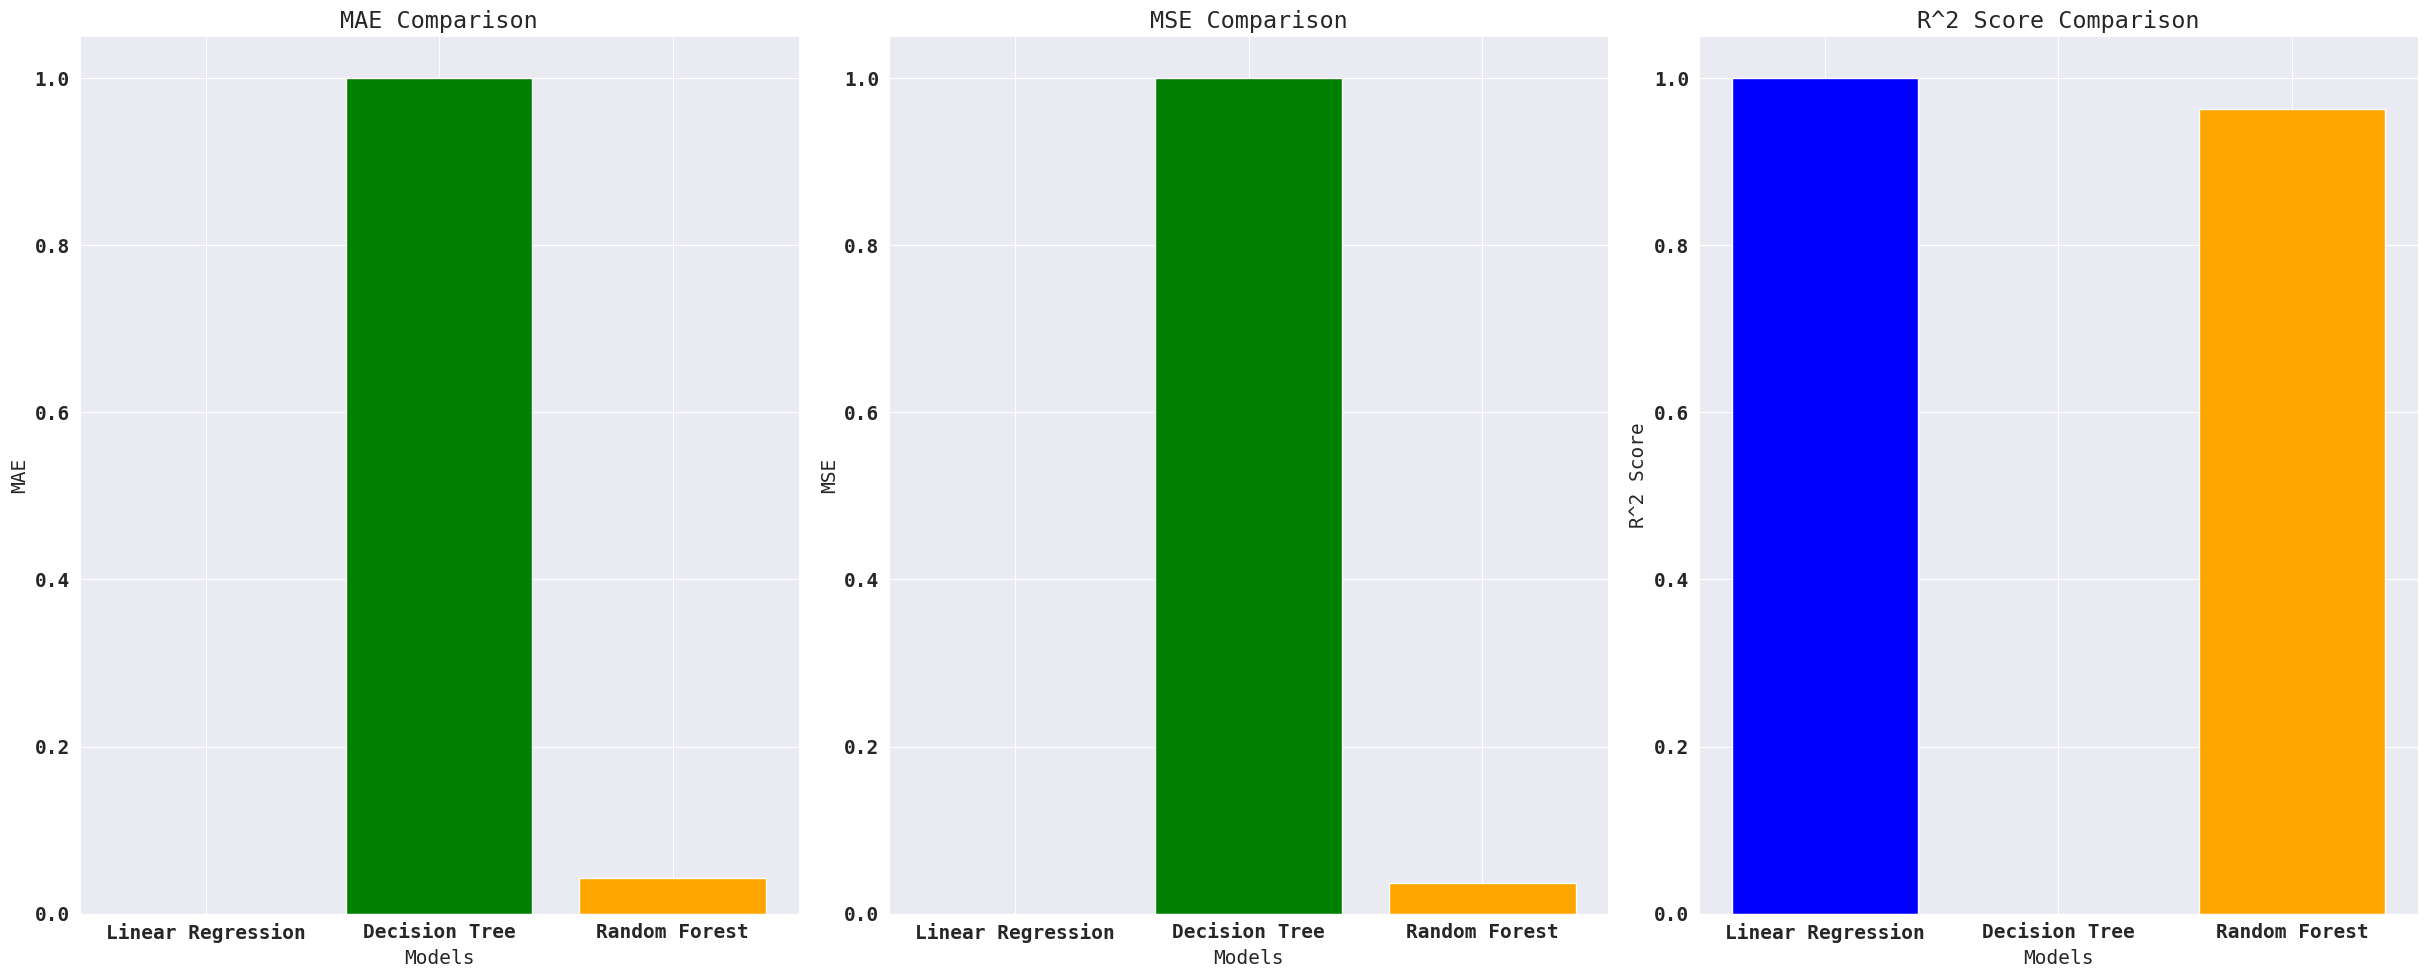

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
d = comparison_df.copy()
X = d[['MAE', 'MSE', 'R^2 Score']]
y = d['Model']
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled)
# Visualize comparisons
plt.figure(figsize=(24.5, 10))

# MAE Comparison
plt.subplot(1, 3, 1)
plt.bar(y, X_scaled.MAE, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison')

# MSE Comparison
plt.subplot(1, 3, 2)
plt.bar(y, X_scaled.MSE, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison')

# R^2 Score Comparison
plt.subplot(1, 3, 3)
plt.bar(y, X_scaled['R^2 Score'], color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')

plt.tight_layout()
plt.show()

Linear Regression Is The Best Fit Model Among Others. But The problem Is it Has Negative R^2 Score SO Let's Go With Feature Engineering to extract other features to find the R^2 score approximately equals 1 for good/perfect fit.

# Feature Engineering To Create Other New Features

In [94]:
# Add New Features
df['CO2 Tempearture Interaction'] = df['CO2 Emissions'] * df['Temperature']
df['Sea Level Temperature Interaction'] = df['Sea Level Rise'] * df['Temperature']
df['Humidity Temperature Interaction'] = df['Humidity'] * df['Temperature']
df['Precipitation Temperature Interaction'] = df['Precipitation'] * df['Temperature']
df['Wind Speed Temperature Interaction'] = df['Wind Speed'] * df['Temperature']

# Add polynomial features (squared terms)
df['CO2 Squared'] = df['CO2 Emissions'] ** 2
df['Sea Level Squared'] = df['Sea Level Rise'] ** 2
df['Humidity Squared'] = df['Humidity'] ** 2
df['Precipitation Squared'] = df['Precipitation'] ** 2
df['Wind Speed Squared'] = df['Wind Speed'] ** 2
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,CO2 Tempearture Interaction,Sea Level Temperature Interaction,Humidity Temperature Interaction,Precipitation Temperature Interaction,Wind Speed Temperature Interaction,CO2 Squared,Sea Level Squared,Humidity Squared,Precipitation Squared,Wind Speed Squared
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,4308.932290,7.669412,252.594166,147.884653,197.661006,162504.849579,0.514815,558.436271,191.413781,341.955026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,5479.680258,16.656260,607.599335,566.033627,473.134565,157341.931668,1.453748,1934.499496,1678.875560,1173.014538
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,12338.110962,-4.393189,2640.908353,1166.666224,932.401677,203900.251839,0.025851,9341.725016,1823.113337,1164.465191
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,5199.628186,-5.858517,584.310411,63.927853,105.303087,178425.970077,0.226511,2253.205159,26.970793,73.180554
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,5422.711603,15.004350,816.296251,1039.634294,105.702454,168488.082540,1.289943,3817.963529,6192.947044,64.018620


In [95]:
# The List Of Our New Features After Feature Feature Engineering On Our DataSet
new_features = df.drop(['Temperature', "Date", 'Location', 'Country'], axis=1).columns.tolist()
new_features

['CO2 Emissions',
 'Sea Level Rise',
 'Precipitation',
 'Humidity',
 'Wind Speed',
 'CO2 Tempearture Interaction',
 'Sea Level Temperature Interaction',
 'Humidity Temperature Interaction',
 'Precipitation Temperature Interaction',
 'Wind Speed Temperature Interaction',
 'CO2 Squared',
 'Sea Level Squared',
 'Humidity Squared',
 'Precipitation Squared',
 'Wind Speed Squared']

In [96]:
X_new = df[new_features]
Y_new = df.Temperature

# Splitting The Dataset into two sets, Training and Test sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

### Linear Regression Models On New DataSet with New Features

Linear Regression Model with Feature Engineering Performance:
MAE: 0.37647
MSE: 0.35534
R^2 Score: 0.98620



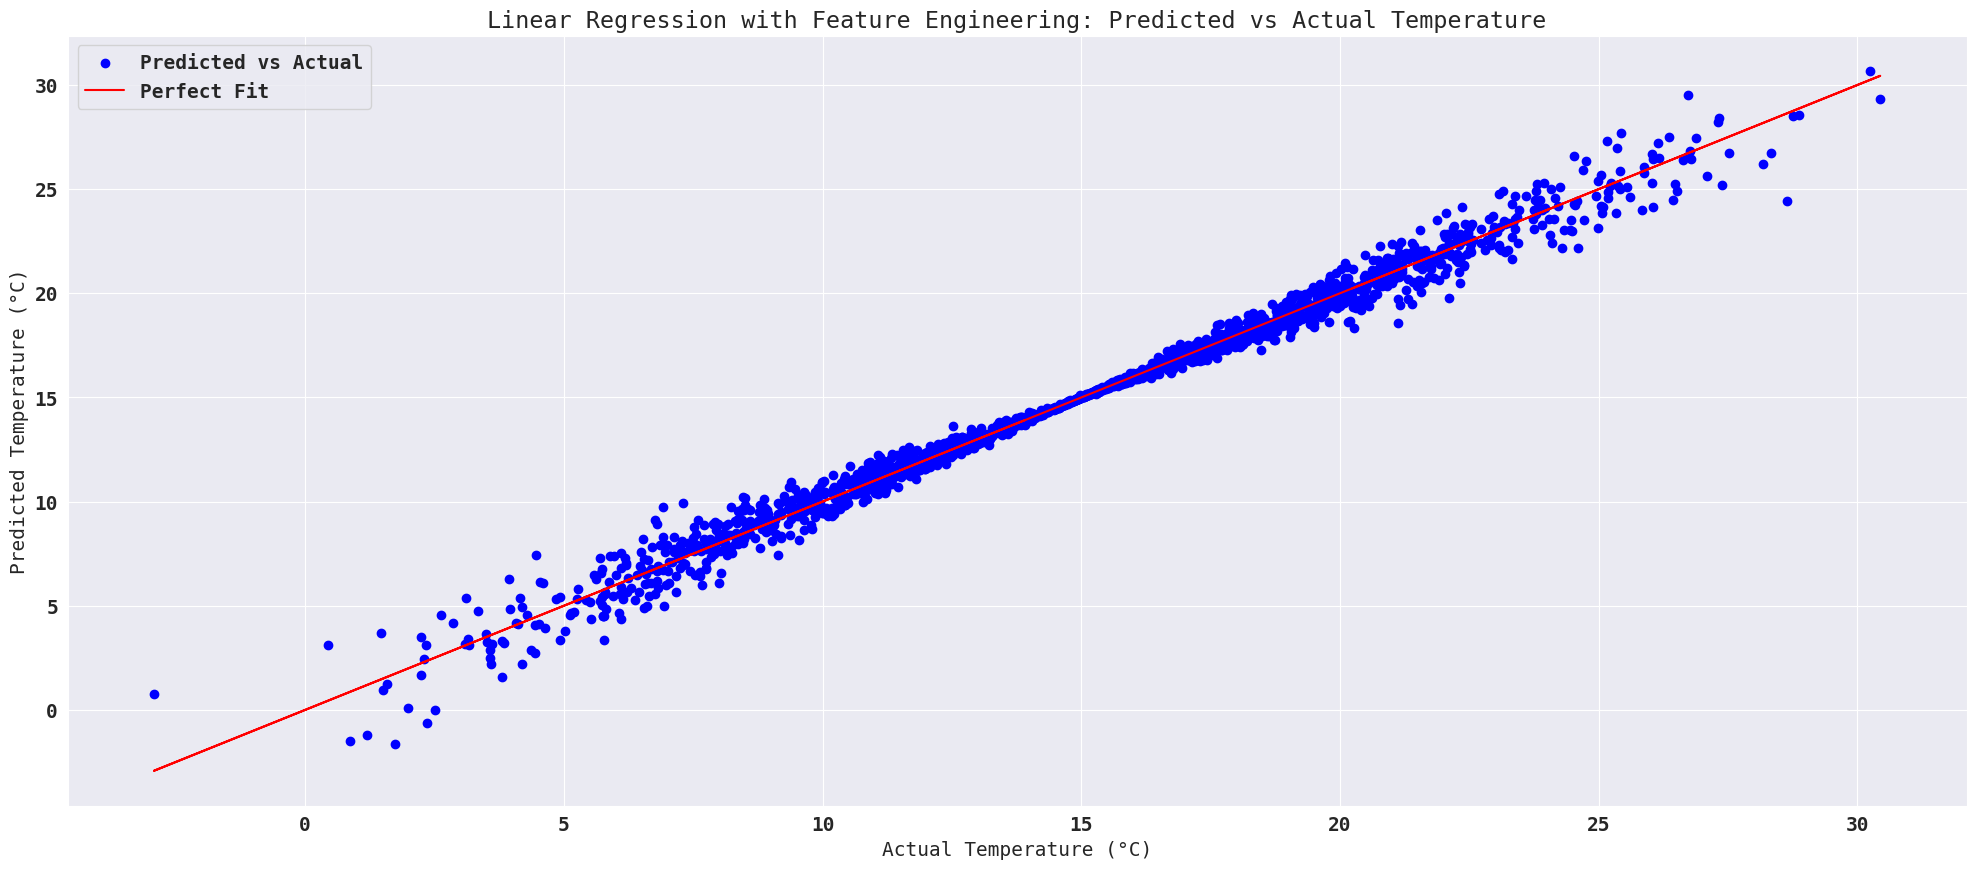

In [97]:
# create and fit the mdoel
linear_model_new = LinearRegression()
linear_model_new.fit(X_new_train, y_new_train)

# Make New Predictions
y_new_pred_linear = linear_model_new.predict(X_new_test)

# Evaluate the Model
print("Linear Regression Model with Feature Engineering Performance:")
print("MAE: {:.5f}".format(mean_absolute_error(y_new_test, y_new_pred_linear)))
print("MSE: {:.5f}".format(mean_squared_error(y_new_test, y_new_pred_linear)))
print("R^2 Score: {:.5f}\n".format(r2_score(y_new_test, y_new_pred_linear)))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_new_test, y_new_pred_linear, color='blue', label='Predicted vs Actual')
plt.plot(y_new_test, y_new_test, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Linear Regression with Feature Engineering: Predicted vs Actual Temperature')
plt.legend()
plt.show()

### Random Forest Regressor Models On New DataSet with New Features

Random Forest Regressor with Feature Engineering Performance:
MAE: 0.06836
MSE: 0.02223
R^2 Score: 0.99914



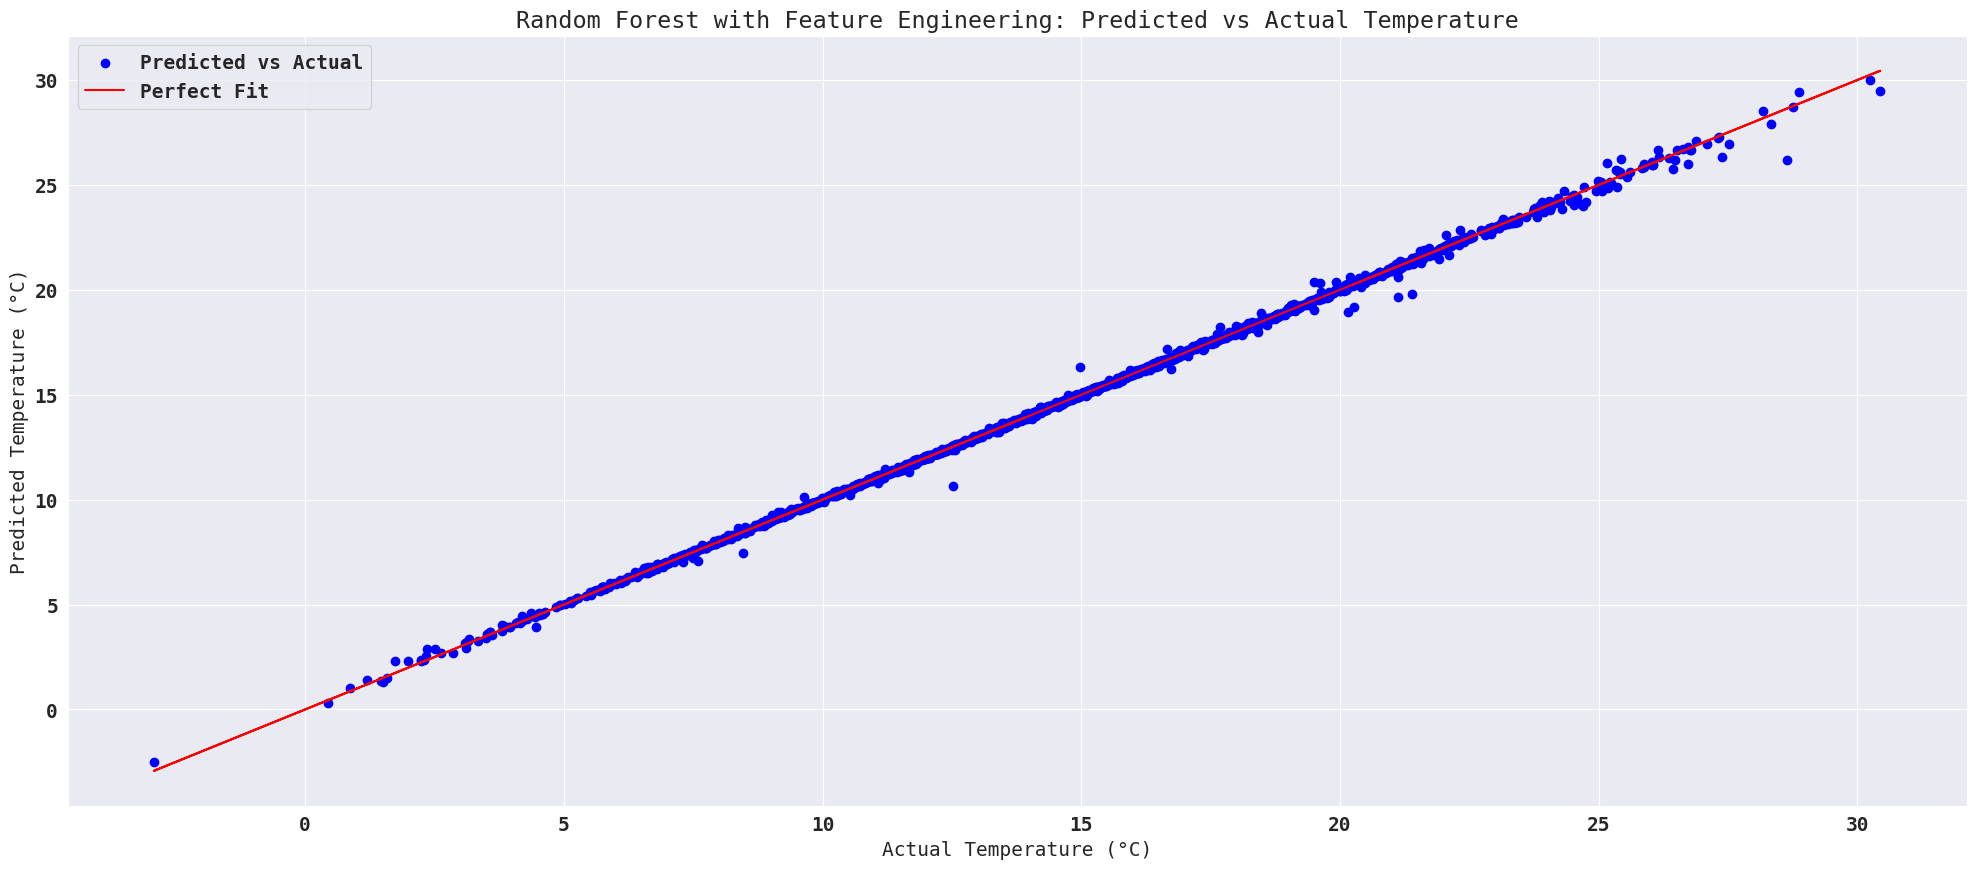

In [98]:
# Create and train the model
forest_model_new = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model_new.fit(X_new_train, y_new_train)

# Make predictions
y_new_pred_forest = forest_model_new.predict(X_new_test)

# Evaluate the model
print("Random Forest Regressor with Feature Engineering Performance:")
print("MAE: {:.5f}".format(mean_absolute_error(y_new_test, y_new_pred_forest)))
print("MSE: {:.5f}".format(mean_squared_error(y_new_test, y_new_pred_forest)))
print("R^2 Score: {:.5f}\n".format(r2_score(y_new_test, y_new_pred_forest)))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_new_test, y_new_pred_forest, color='blue', label='Predicted vs Actual')
plt.plot(y_new_test, y_new_test, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Random Forest with Feature Engineering: Predicted vs Actual Temperature')
plt.legend()
plt.show()


### Decision Tree Regressor Models On New DataSet with New Features

Decision Tree Regressor with Feature Engineering Performance:
MAE: 0.17432
MSE: 0.08301
R^2 Score: 0.99678



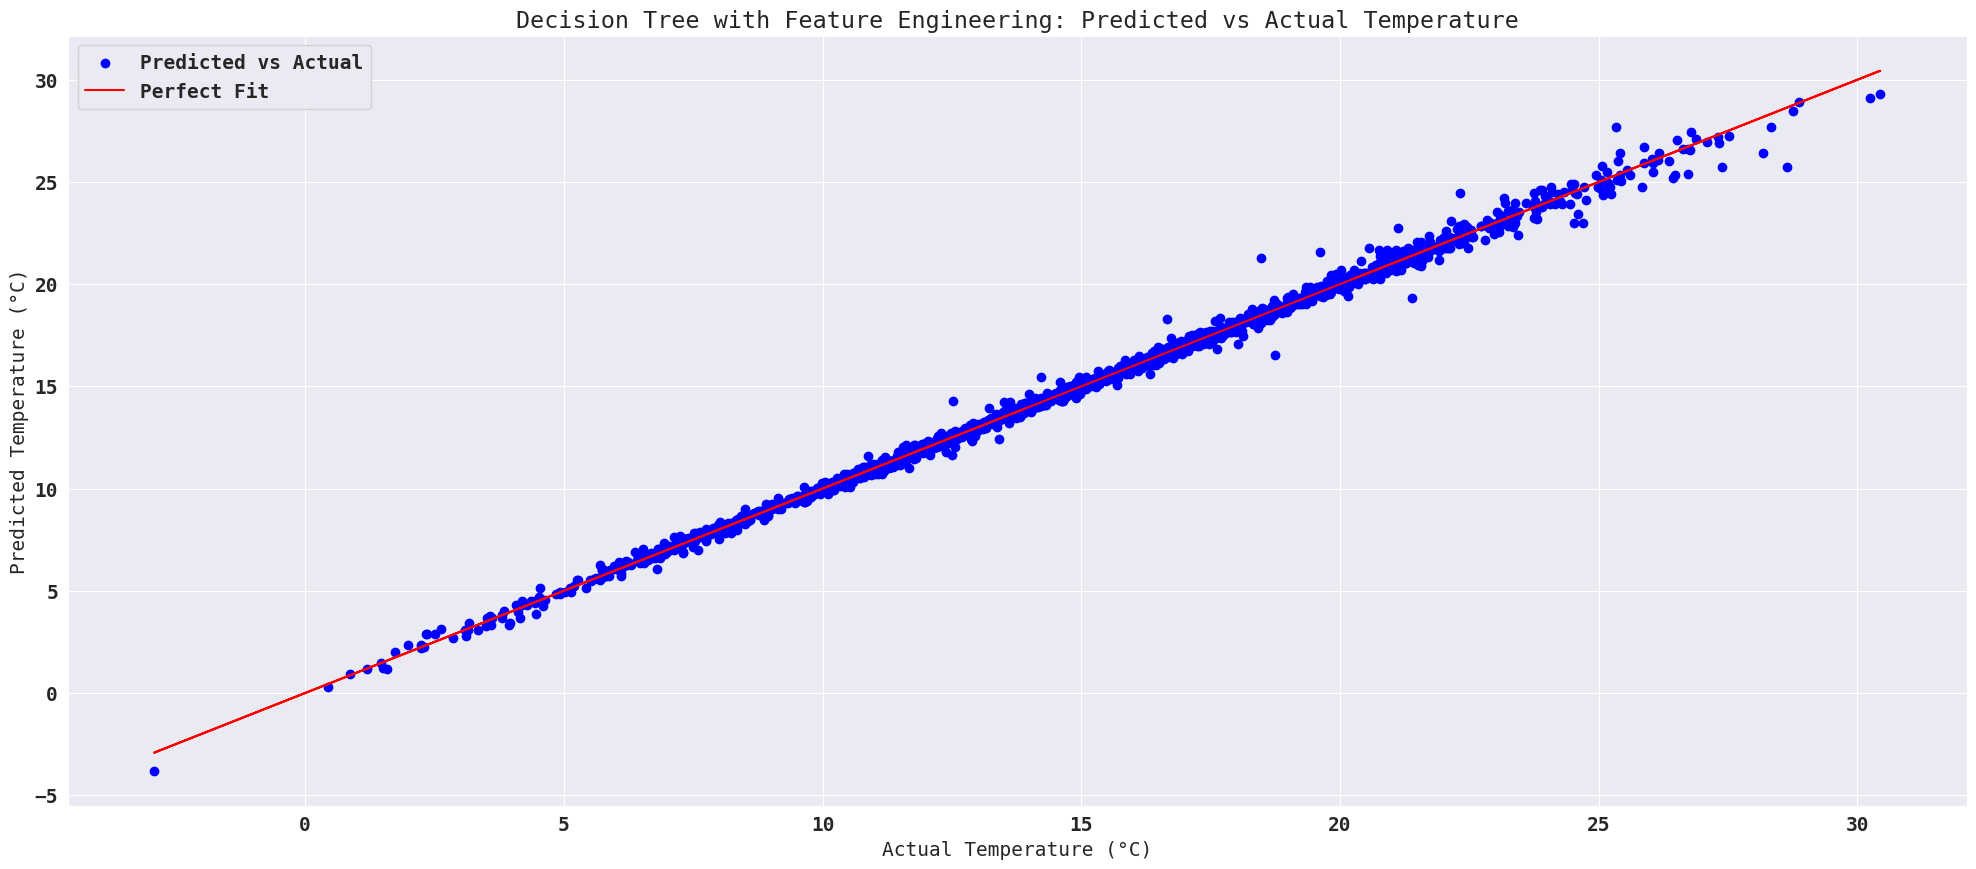

In [99]:
# Create and train the model
tree_model_new = DecisionTreeRegressor(random_state=42)
tree_model_new.fit(X_new_train, y_new_train)

# Make predictions
y_pred_tree_new = tree_model_new.predict(X_new_test)

# Evaluate the model
print("Decision Tree Regressor with Feature Engineering Performance:")
print("MAE: {:.5f}".format(mean_absolute_error(y_new_test, y_pred_tree_new)))
print("MSE: {:.5f}".format(mean_squared_error(y_new_test, y_pred_tree_new)))
print("R^2 Score: {:.5f}\n".format(r2_score(y_new_test, y_pred_tree_new)))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_new_test, y_pred_tree_new, color='blue', label='Predicted vs Actual')
plt.plot(y_new_test, y_new_test, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Decision Tree with Feature Engineering: Predicted vs Actual Temperature')
plt.legend()
plt.show()

In [100]:
# Collect performance metrics for all models After Feature Engineering
models_new = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_new = [mean_absolute_error(y_new_test, y_new_pred_linear), mean_absolute_error(y_new_test, y_pred_tree_new), mean_absolute_error(y_new_test, y_new_pred_forest)]
mse_new = [mean_squared_error(y_new_test, y_new_pred_linear), mean_squared_error(y_new_test, y_pred_tree_new), mean_squared_error(y_new_test, y_new_pred_forest)]
r2_new = [r2_score(y_new_test, y_new_pred_linear), r2_score(y_new_test, y_pred_tree_new), r2_score(y_new_test, y_new_pred_forest)]

comparison_df_new = pd.DataFrame({
    'Model': models_new,
    'MAE': mae_new,
    'MSE': mse_new,
    'R^2 Score': r2_new
})

print(comparison_df_new)

               Model       MAE       MSE  R^2 Score
0  Linear Regression  0.376470  0.355336   0.986201
1      Decision Tree  0.174319  0.083013   0.996776
2      Random Forest  0.068360  0.022233   0.999137


# Comparization With Visualizations After Feature Engineering

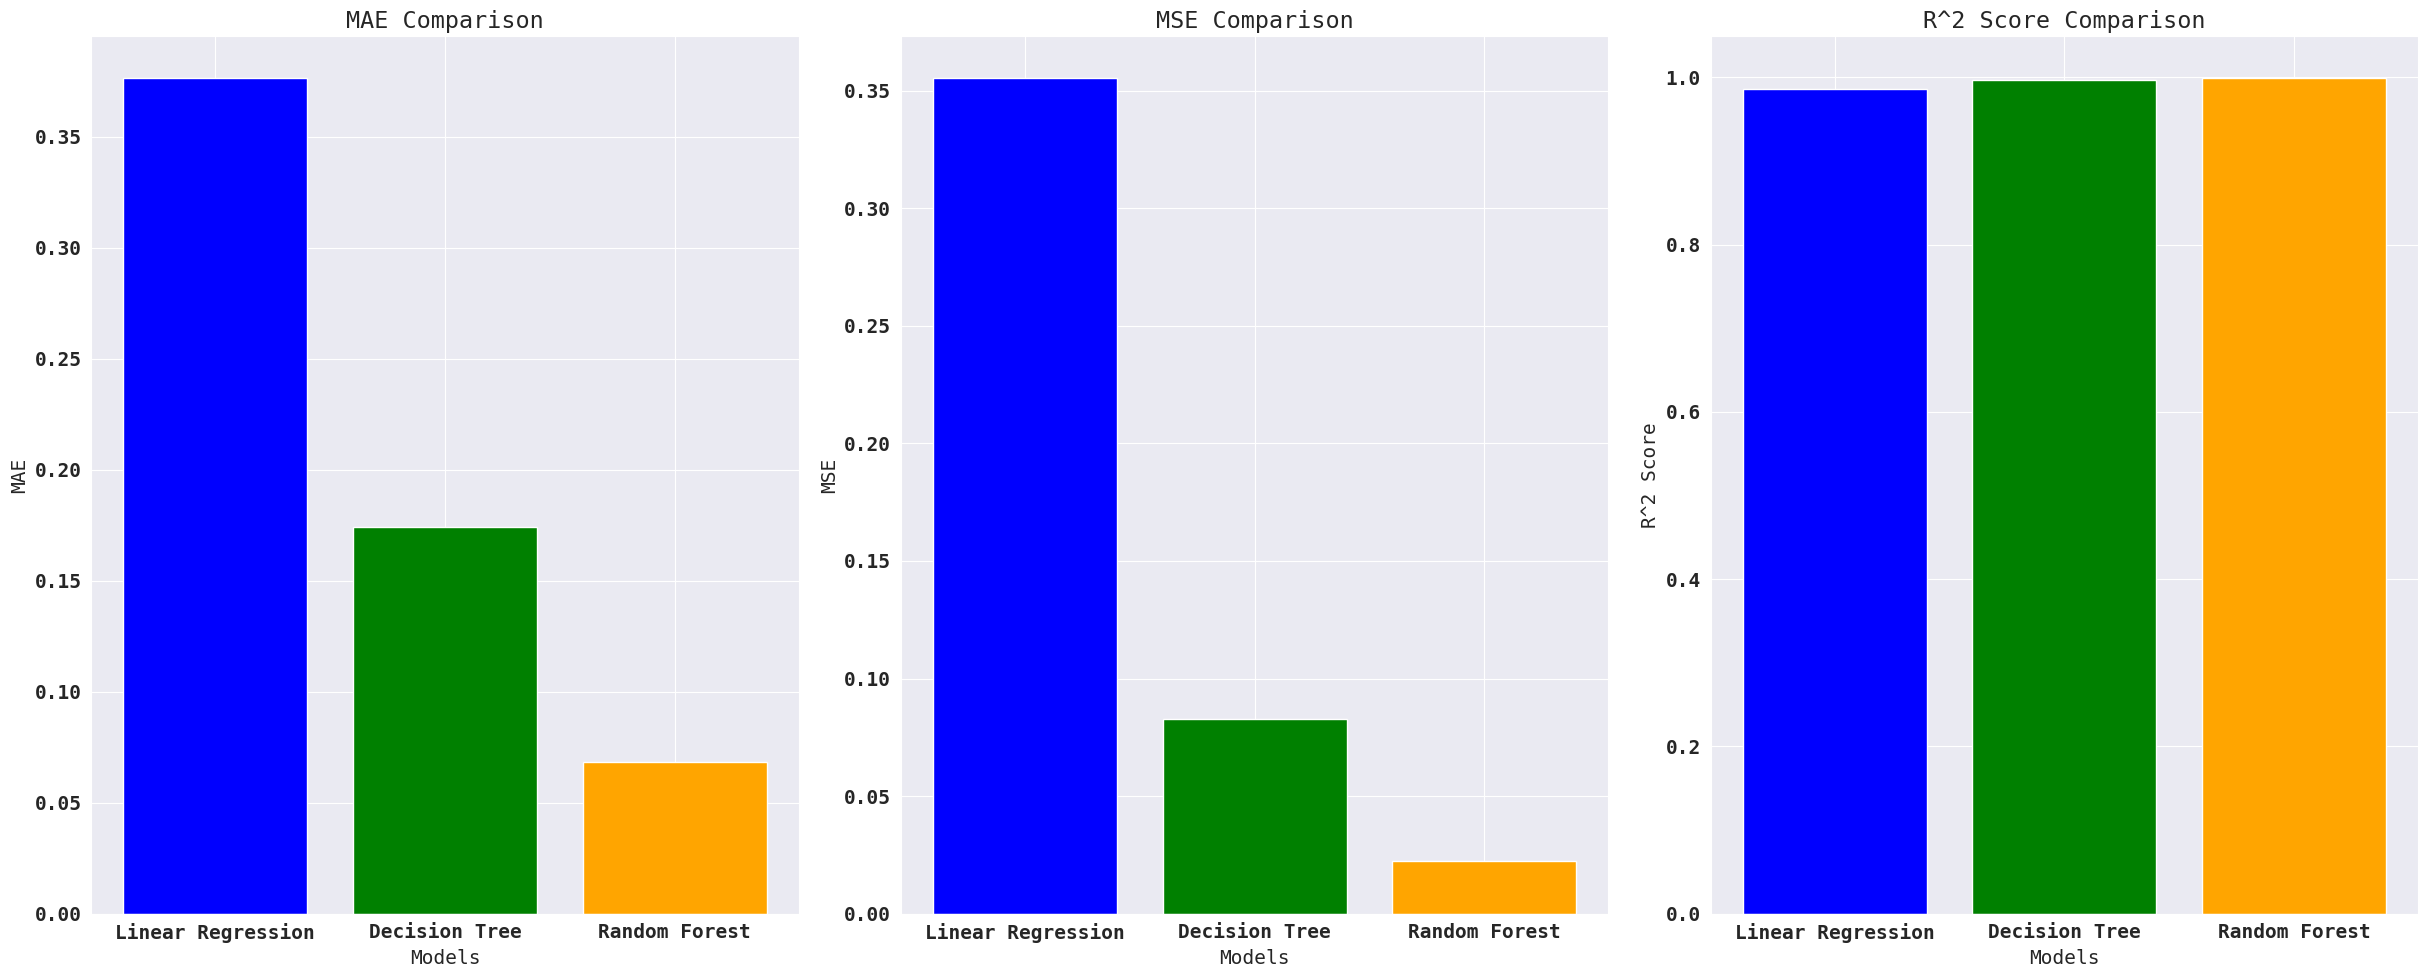

In [101]:
# Visualize comparisons
plt.figure(figsize=(24.5, 10))

# MAE Comparison
plt.subplot(1, 3, 1)
plt.bar(models_new, mae_new, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison')

# MSE Comparison
plt.subplot(1, 3, 2)
plt.bar(models_new, mse_new, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison')

# R^2 Score Comparison
plt.subplot(1, 3, 3)
plt.bar(models_new, r2_new, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')

plt.tight_layout()
plt.show()

After Extracting New Features, Random Forest Models works well on the Datasets. Since its MAE and MSE are low compared to other's models and R^2 Score is approximately 1

# Climate Factors Vs Countries/Locations With One-Hot Encoding

In [102]:
# Return Only Categorical Features In Our Data set
categorical_features = df.select_dtypes('object').columns.tolist()
categorical_features

['Location', 'Country']

In [111]:
# The occurence of each country
df.Country.value_counts()

Country
Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: count, Length: 243, dtype: int64

In [112]:
df.Location.value_counts()

Location
North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: count, Length: 7764, dtype: int64

In [113]:
# Let's Do One-Hot Encoding with Country Column
df_Country_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)
df_Country_encoded.head()

,Date,Location,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,CO2 Tempearture Interaction,Sea Level Temperature Interaction,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2000-01-01 00:00:00.000000000,New Williamtown,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,4308.932290,7.669412,...,False,False,False,False,False,False,False,False,False,False
1,2000-01-01 20:09:43.258325832,North Rachel,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,5479.680258,16.656260,...,False,False,False,False,False,False,False,False,False,False
2,2000-01-02 16:19:26.516651665,West Williamland,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,12338.110962,-4.393189,...,False,False,False,False,False,False,False,False,False,False
3,2000-01-03 12:29:09.774977497,South David,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,5199.628186,-5.858517,...,False,False,False,False,True,False,False,False,False,False
4,2000-01-04 08:38:53.033303330,New Scottburgh,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,5422.711603,15.004350,...,False,False,False,False,False,False,False,False,False,False


In [114]:
# Define features (X) and target (y)
X = df_Country_encoded.drop(columns=['Temperature', "Date", "Location"])  # Drop the target variable
y = df_Country_encoded['Temperature']  # Target variable

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Models

Linear Regression with One-Hot Encoding Performance:
MAE: 0.3883650491254988
MSE: 0.3621173275153982
R^2 Score: 0.9859373119990106


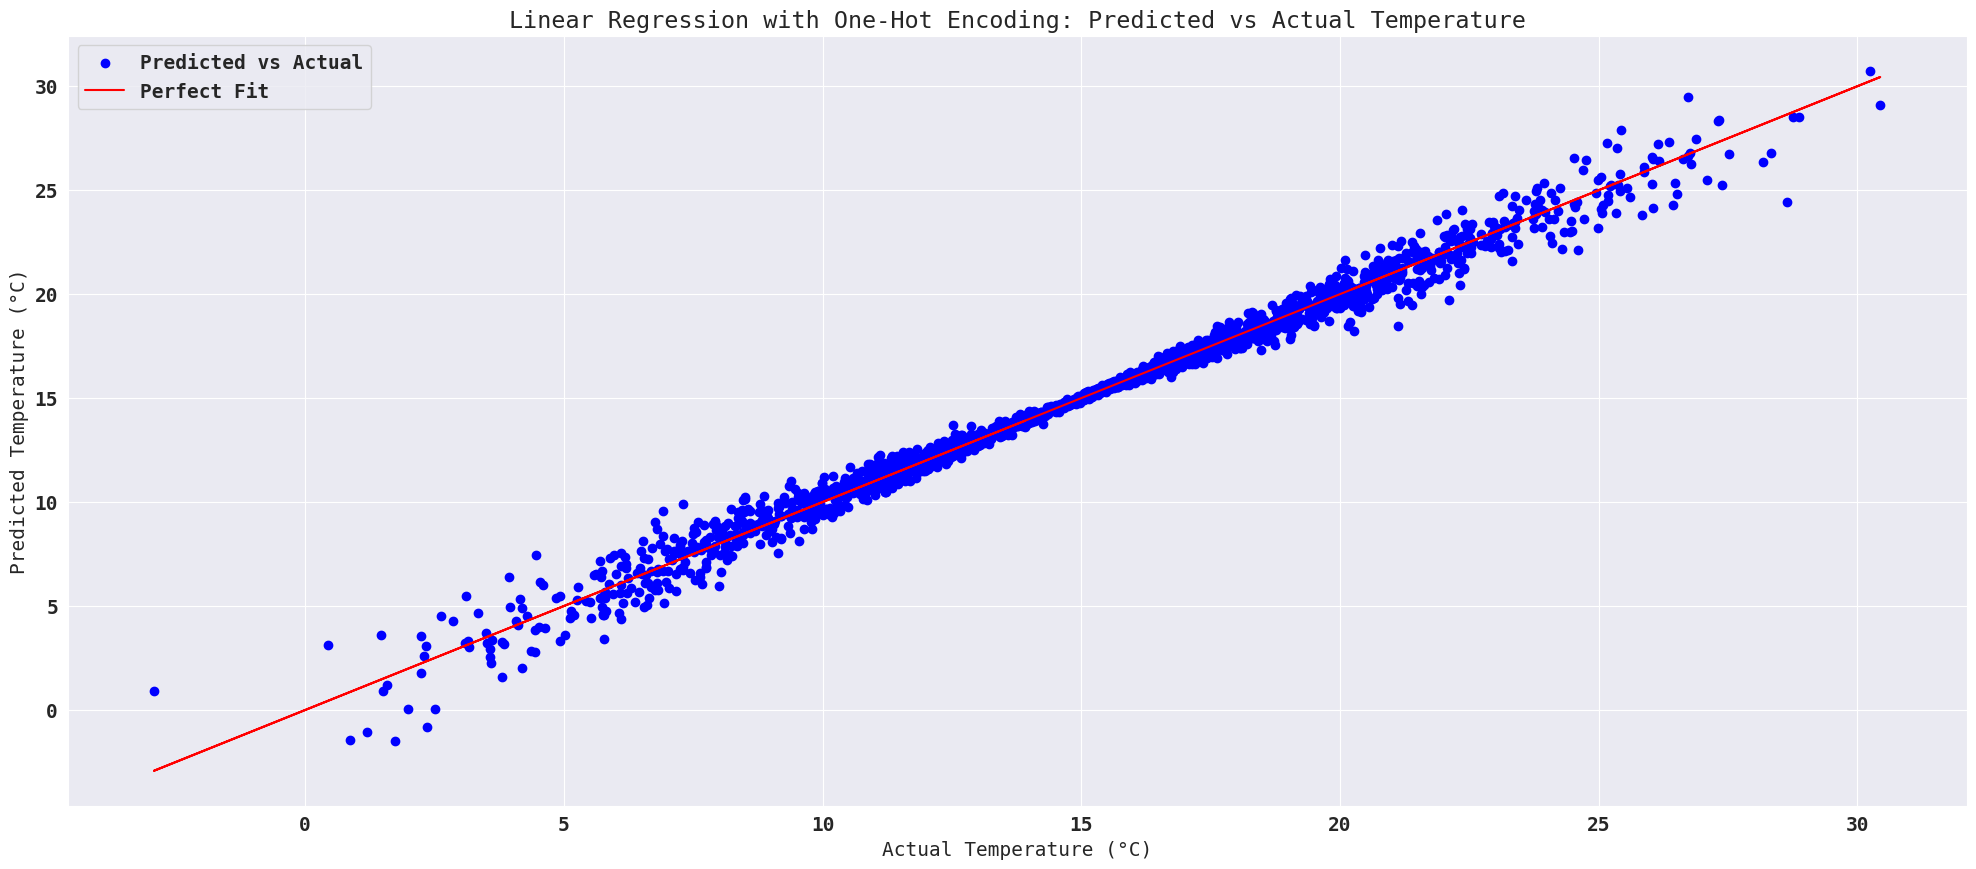

In [117]:
# Create and train the Random linear model
linear_model_encoded = LinearRegression()
linear_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_linear_encoded = linear_model_encoded.predict(X_test_encoded)
# Evaluate the model
print("Linear Regression with One-Hot Encoding Performance:")
print("MAE:", mean_absolute_error(y_test_encoded, y_pred_linear_encoded))
print("MSE:", mean_squared_error(y_test_encoded, y_pred_linear_encoded))
print("R^2 Score:", r2_score(y_test_encoded, y_pred_linear_encoded))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_test_encoded, y_pred_linear_encoded, color='blue', label='Predicted vs Actual')
plt.plot(y_test_encoded, y_test_encoded, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Linear Regression with One-Hot Encoding: Predicted vs Actual Temperature')
plt.legend()
plt.show()

### Random Forest Models

Random Forest with One-Hot Encoding Performance:
MAE: 0.069171237134217
MSE: 0.02179806262048765
R^2 Score: 0.9991534805700649


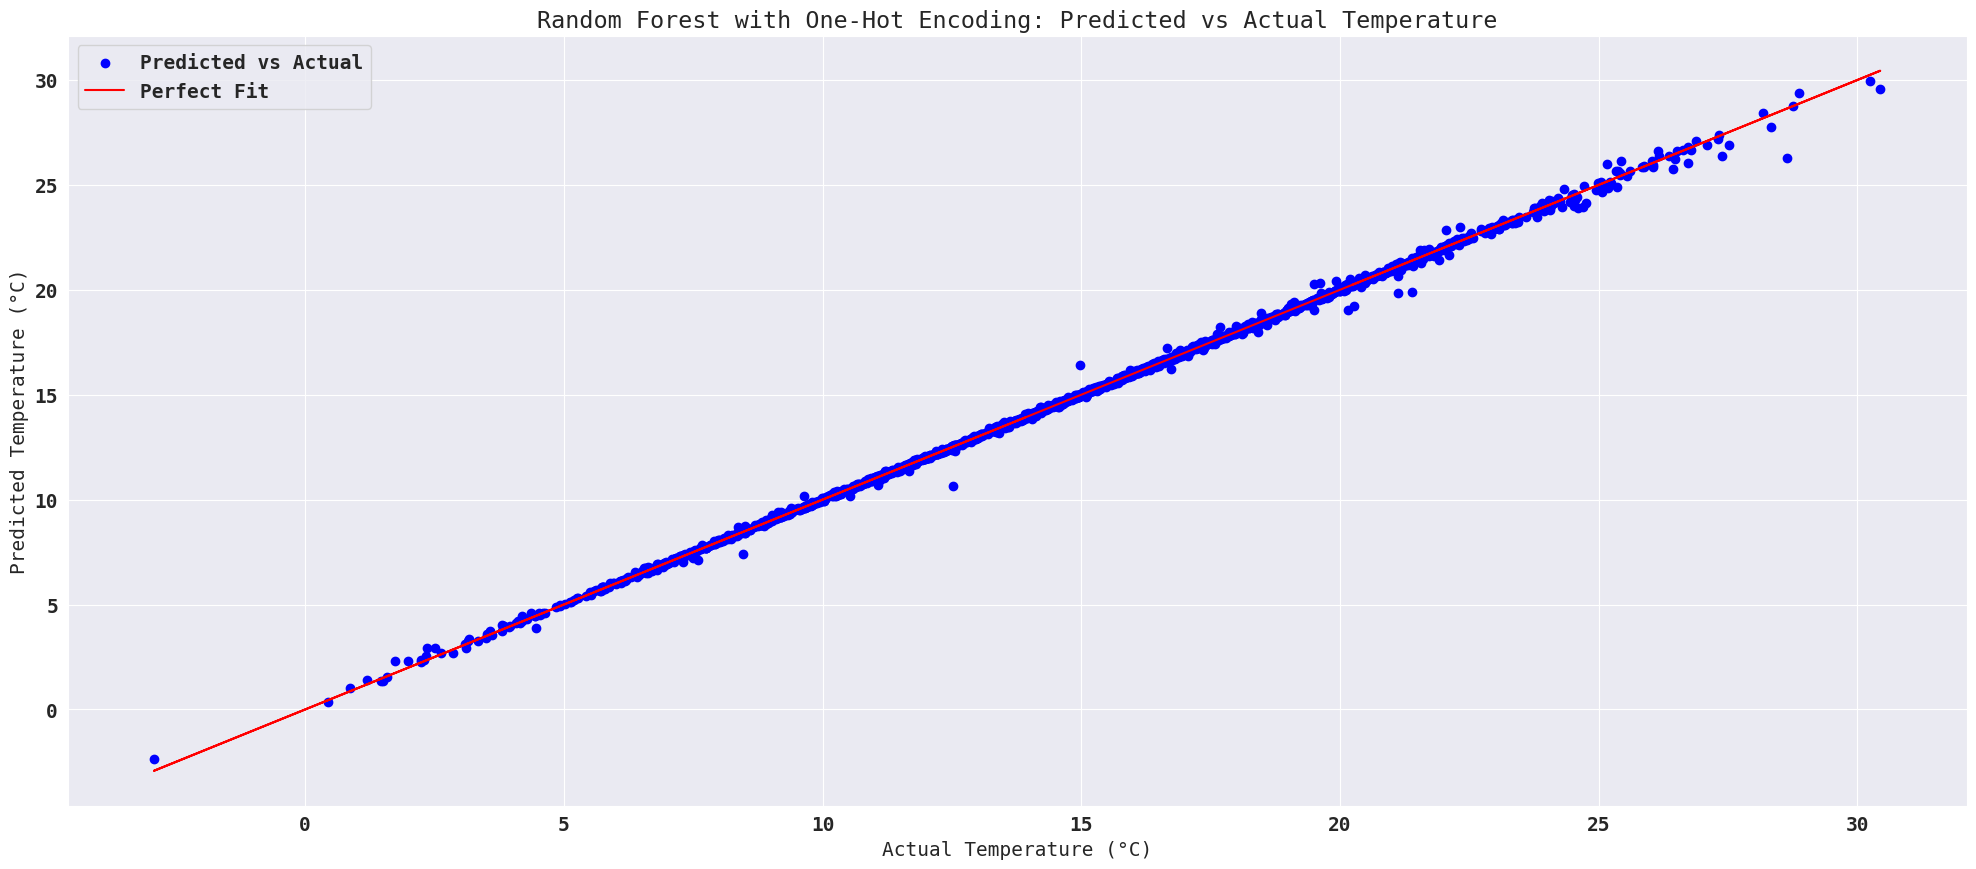

In [118]:
# Create and train the Random Forest model
forest_model_encoded = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_forest_encoded = forest_model_encoded.predict(X_test_encoded)
# Evaluate the model
print("Random Forest with One-Hot Encoding Performance:")
print("MAE:", mean_absolute_error(y_test_encoded, y_pred_forest_encoded))
print("MSE:", mean_squared_error(y_test_encoded, y_pred_forest_encoded))
print("R^2 Score:", r2_score(y_test_encoded, y_pred_forest_encoded))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_test_encoded, y_pred_forest_encoded, color='blue', label='Predicted vs Actual')
plt.plot(y_test_encoded, y_test_encoded, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Random Forest with One-Hot Encoding: Predicted vs Actual Temperature')
plt.legend()
plt.show()

### Decision Tree Models

Random tree with One-Hot Encoding Performance:
MAE: 0.17021234871845853
MSE: 0.07422955478248892
R^2 Score: 0.9971173236129826


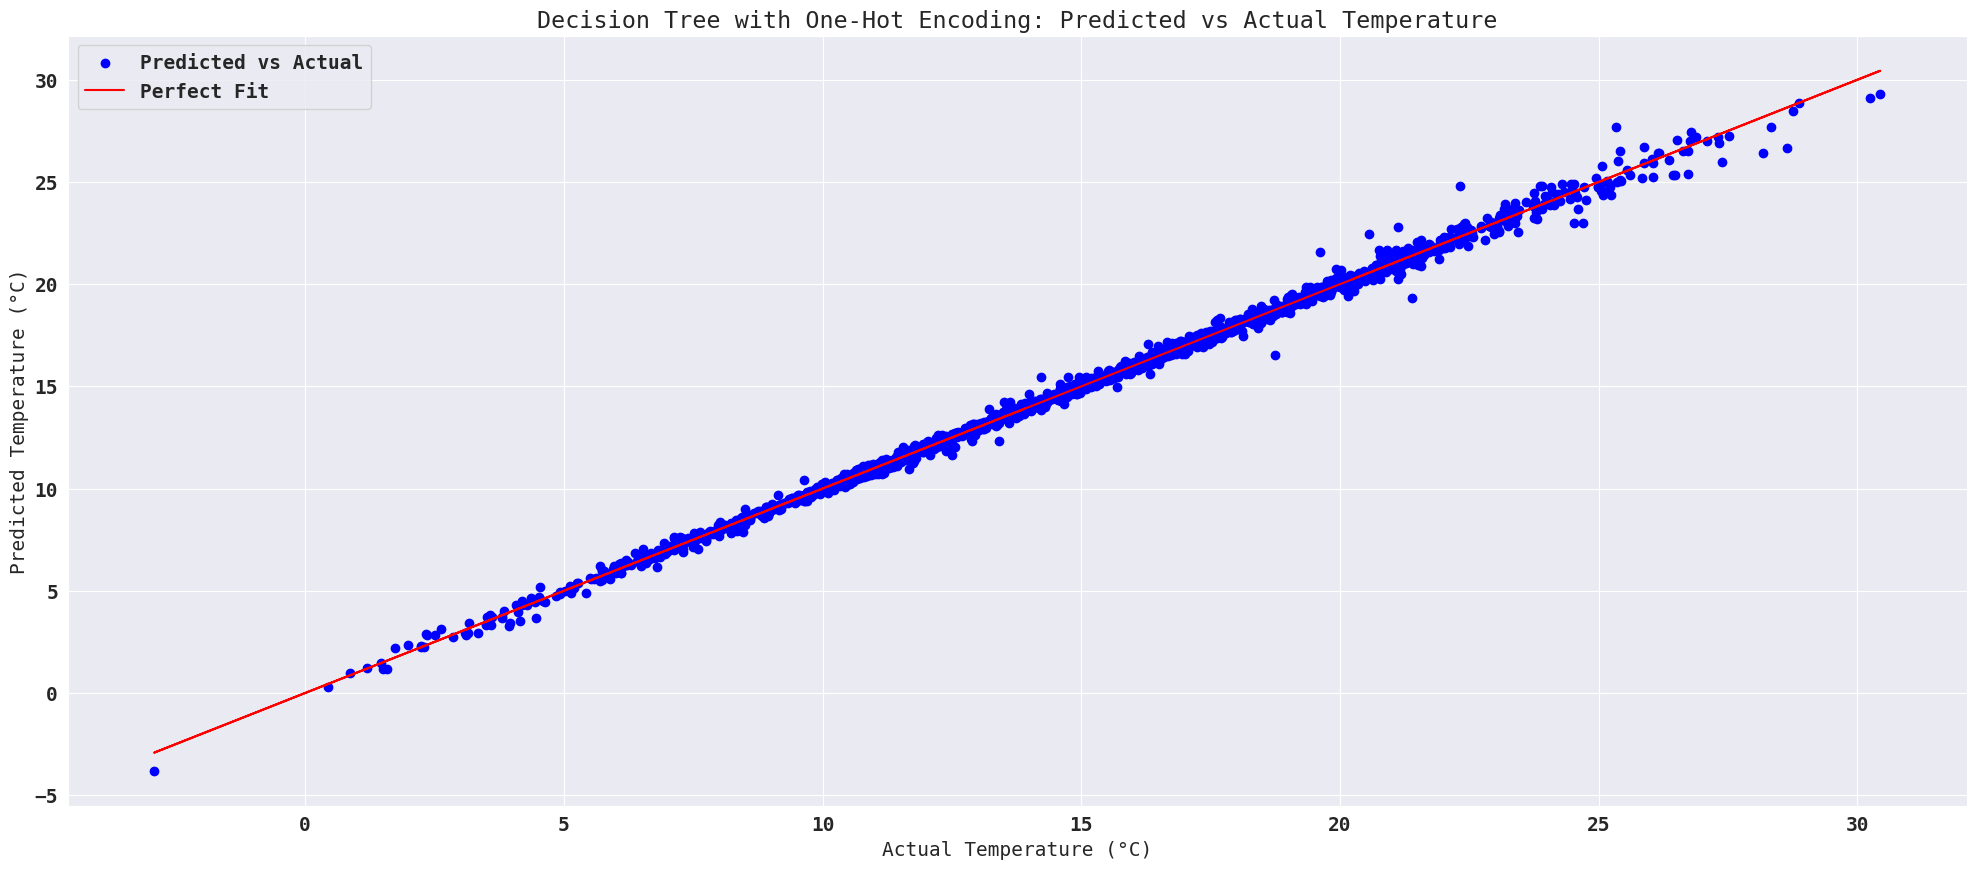

In [119]:
# Create and train the Decision tree model
tree_model_encoded = DecisionTreeRegressor(random_state=42)
tree_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_tree_encoded = tree_model_encoded.predict(X_test_encoded)
# Evaluate the model
print("Random tree with One-Hot Encoding Performance:")
print("MAE:", mean_absolute_error(y_test_encoded, y_pred_tree_encoded))
print("MSE:", mean_squared_error(y_test_encoded, y_pred_tree_encoded))
print("R^2 Score:", r2_score(y_test_encoded, y_pred_tree_encoded))

# Plot predictions vs actual values
plt.figure(figsize=(24.5, 10))
plt.scatter(y_test_encoded, y_pred_tree_encoded, color='blue', label='Predicted vs Actual')
plt.plot(y_test_encoded, y_test_encoded, color='red', label='Perfect Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Decision Tree with One-Hot Encoding: Predicted vs Actual Temperature')
plt.legend()
plt.show()

In [120]:
# Collect performance metrics for all models After Feature Engineering
models_encoded = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_encoded = [mean_absolute_error(y_test_encoded, y_pred_linear_encoded), mean_absolute_error(y_test_encoded, y_pred_tree_encoded), mean_absolute_error(y_test_encoded, y_pred_forest_encoded)]
mse_encoded = [mean_squared_error(y_test_encoded, y_pred_linear_encoded), mean_squared_error(y_test_encoded, y_pred_tree_encoded), mean_squared_error(y_test_encoded, y_pred_forest_encoded)]
r2_encoded = [r2_score(y_test_encoded, y_pred_linear_encoded), r2_score(y_test_encoded, y_pred_tree_encoded), r2_score(y_test_encoded, y_pred_forest_encoded)]

comparison_df_encoded = pd.DataFrame({
    'Model': models_encoded,
    'MAE': mae_encoded,
    'MSE': mse_encoded,
    'R^2 Score': r2_encoded
})

print(comparison_df_encoded)

               Model       MAE       MSE  R^2 Score
0  Linear Regression  0.388365  0.362117   0.985937
1      Decision Tree  0.170212  0.074230   0.997117
2      Random Forest  0.069171  0.021798   0.999153


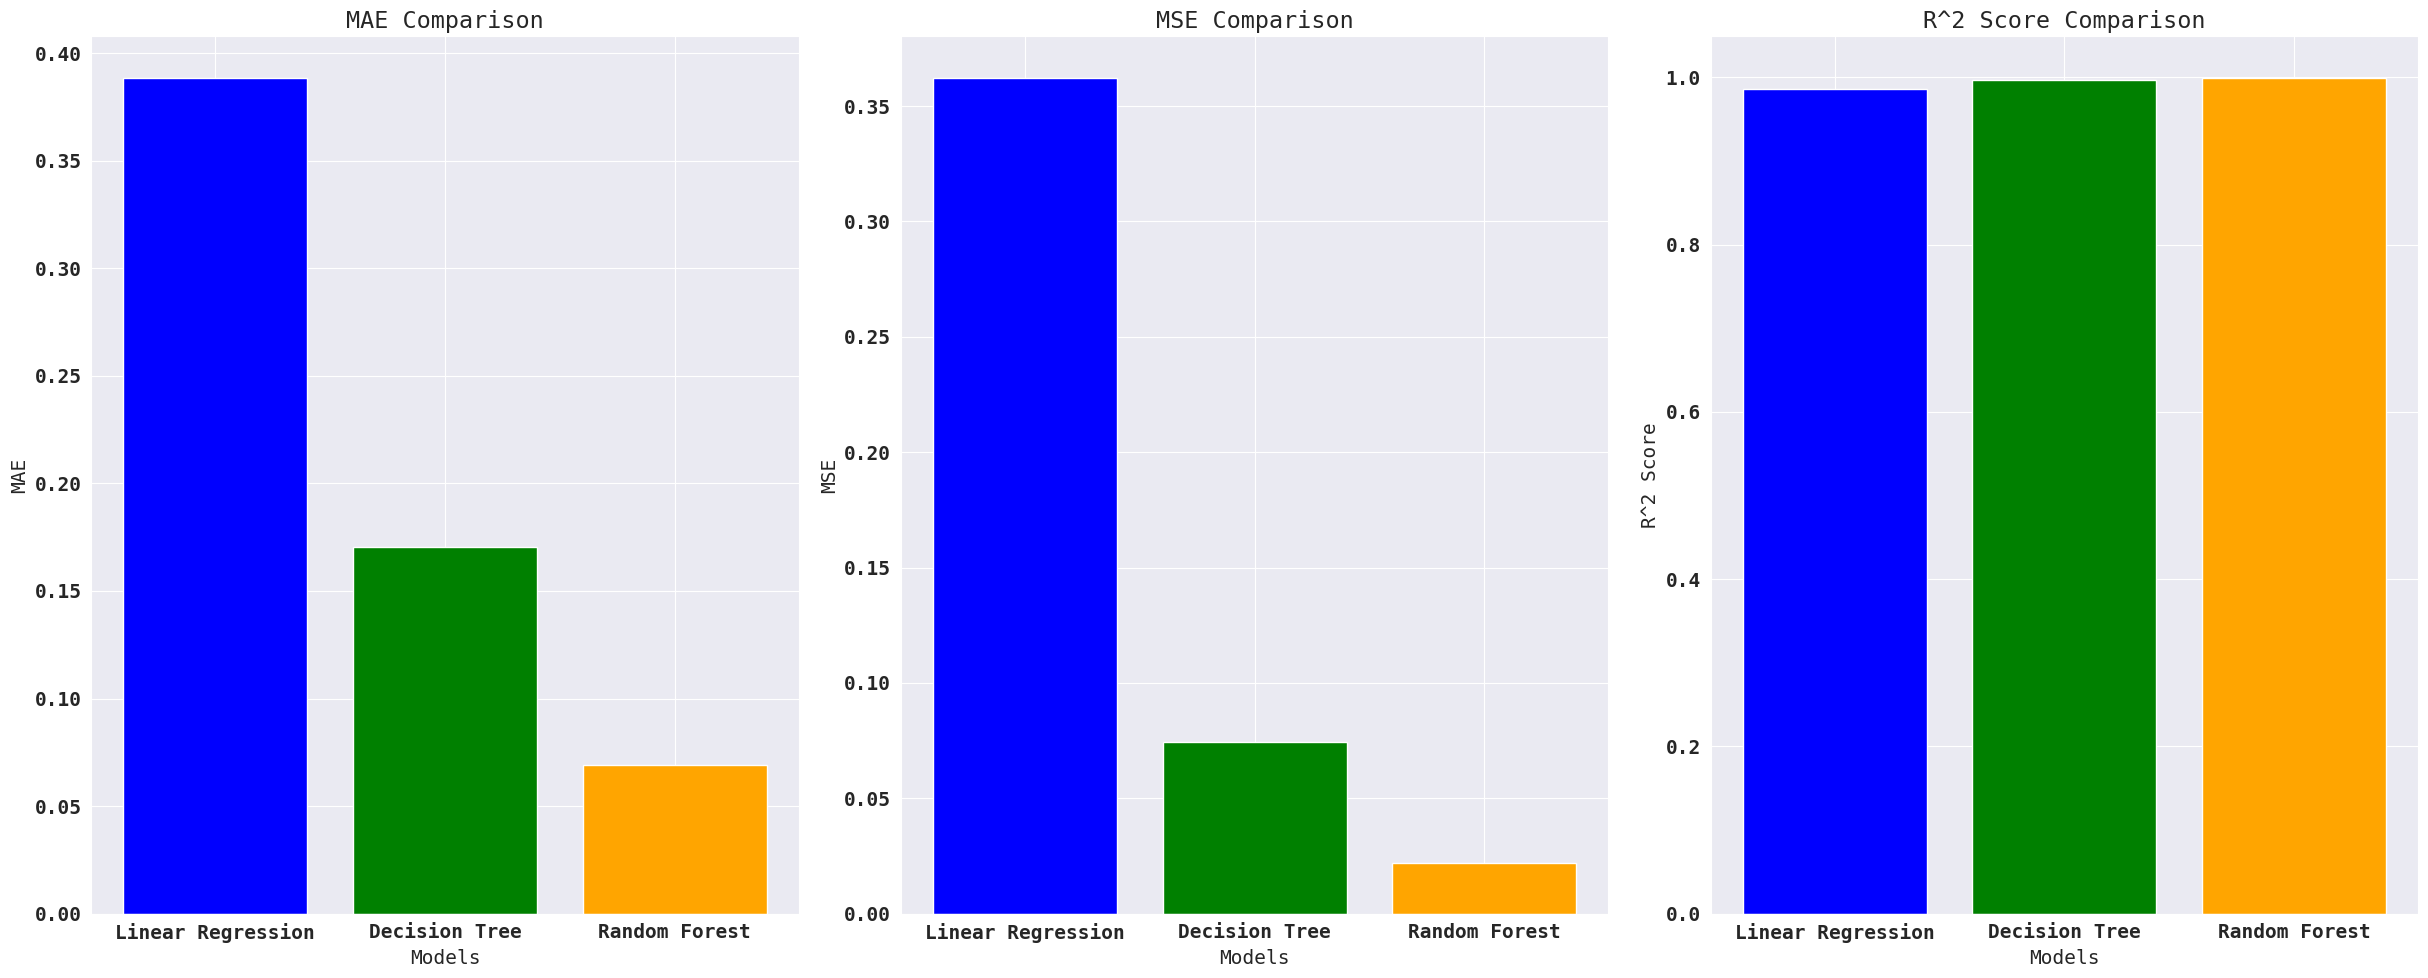

In [121]:
# Visualize comparisons
plt.figure(figsize=(24.5, 10))

# MAE Comparison
plt.subplot(1, 3, 1)
plt.bar(models_encoded, mae_encoded, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison')

# MSE Comparison
plt.subplot(1, 3, 2)
plt.bar(models_encoded, mse_encoded, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison')

# R^2 Score Comparison
plt.subplot(1, 3, 3)
plt.bar(models_encoded, r2_encoded, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')

plt.tight_layout()
plt.show()

## Feature Importance
Random Forest Works Good for our One-Hot encoded data sets

In [122]:
# Get feature importances
importances = forest_model_encoded.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(20))  # Display top 20 important features

                                   Feature  Importance
5              CO2 Tempearture Interaction    0.893728
10                             CO2 Squared    0.056061
0                            CO2 Emissions    0.048590
9       Wind Speed Temperature Interaction    0.000264
7         Humidity Temperature Interaction    0.000227
8    Precipitation Temperature Interaction    0.000195
11                       Sea Level Squared    0.000139
6        Sea Level Temperature Interaction    0.000099
1                           Sea Level Rise    0.000079
12                        Humidity Squared    0.000076
4                               Wind Speed    0.000075
3                                 Humidity    0.000075
13                   Precipitation Squared    0.000073
2                            Precipitation    0.000067
14                      Wind Speed Squared    0.000067
247                        Country_Uruguay    0.000016
118                    Country_Isle of Man    0.000008
138       

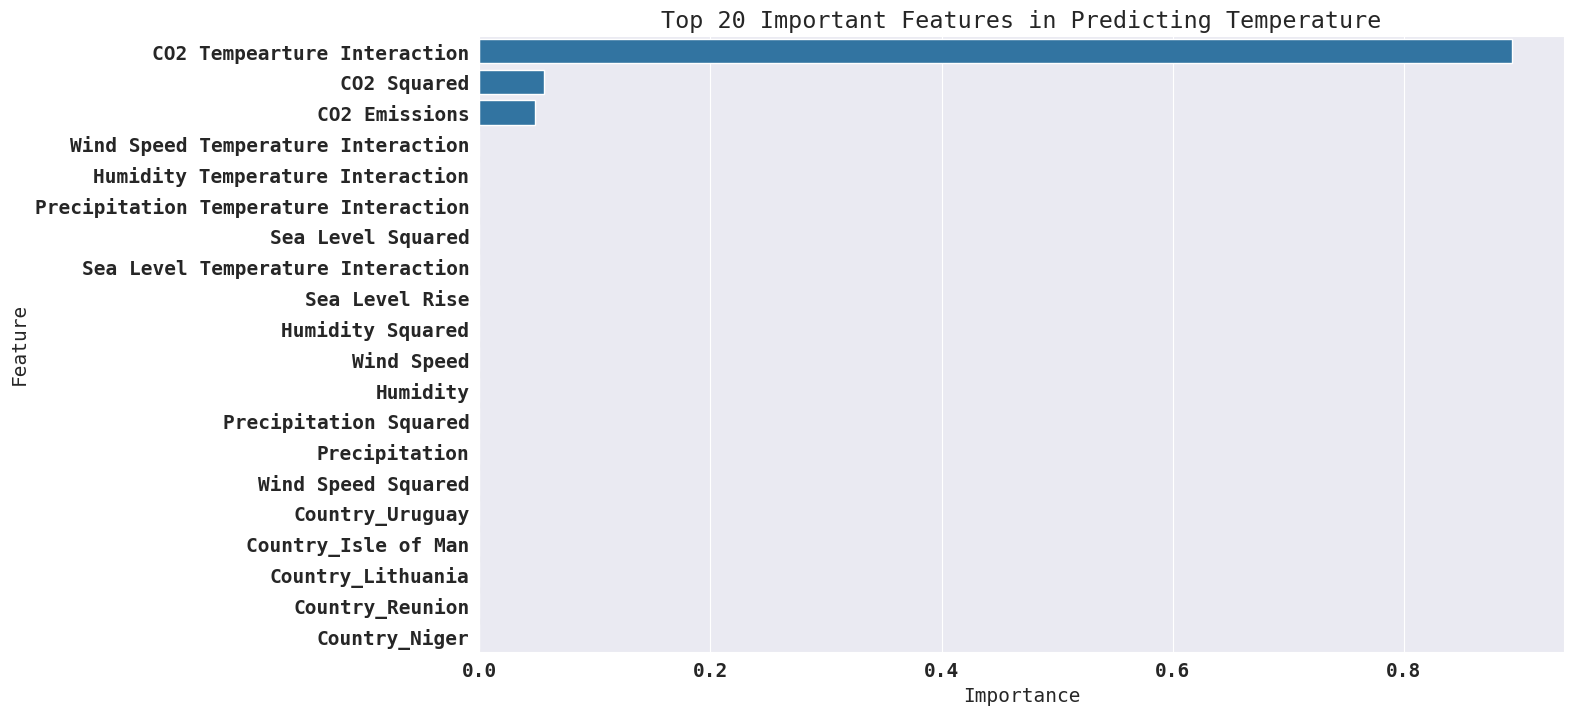

In [123]:
# Visualize feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Important Features in Predicting Temperature')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [124]:
# One-Hot Encoding For 'Location' Column
df_Location_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)
df_Location_encoded.head()

,Date,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,CO2 Tempearture Interaction,Sea Level Temperature Interaction,...,Location_Zacharybury,Location_Zacharychester,Location_Zacharyland,Location_Zacharyton,Location_Zacharytown,Location_Zacharyville,Location_Zavalahaven,Location_Zavalaside,Location_Zimmermanfort,Location_Zunigaburgh
0,2000-01-01 00:00:00.000000000,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,4308.932290,7.669412,...,False,False,False,False,False,False,False,False,False,False
1,2000-01-01 20:09:43.258325832,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,5479.680258,16.656260,...,False,False,False,False,False,False,False,False,False,False
2,2000-01-02 16:19:26.516651665,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,12338.110962,-4.393189,...,False,False,False,False,False,False,False,False,False,False
3,2000-01-03 12:29:09.774977497,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,5199.628186,-5.858517,...,False,False,False,False,False,False,False,False,False,False
4,2000-01-04 08:38:53.033303330,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,5422.711603,15.004350,...,False,False,False,False,False,False,False,False,False,False


In [125]:
# Define features (X) and target (y)
X = df_Location_encoded.drop(columns=['Temperature', "Date", "Country"])  # Drop the target variable
y = df_Location_encoded['Temperature']  # Target variable

# Split the data into training and testing sets
X_train_encoded1, X_test_encoded1, y_train_encoded1, y_test_encoded1 = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Models

In [126]:
# Create and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_encoded1, y_train_encoded1)

# Make predictions
y_pred_forest = forest_model.predict(X_test_encoded1)
# Evaluate the model
print("Random Forest with One-Hot Encoding Performance:")
print("MAE:", mean_absolute_error(y_test_encoded, y_pred_forest))
print("MSE:", mean_squared_error(y_test_encoded, y_pred_forest))
print("R^2 Score:", r2_score(y_test_encoded, y_pred_forest))

Random Forest with One-Hot Encoding Performance:
MAE: 0.06904592911692142
MSE: 0.02255291954779358
R^2 Score: 0.999124165989824


In [127]:
# Get feature importances
importances = forest_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(20))  # Display top 20 important features

                                    Feature  Importance
5               CO2 Tempearture Interaction    0.893771
0                             CO2 Emissions    0.053418
10                              CO2 Squared    0.051224
9        Wind Speed Temperature Interaction    0.000225
7          Humidity Temperature Interaction    0.000219
8     Precipitation Temperature Interaction    0.000181
11                        Sea Level Squared    0.000140
6         Sea Level Temperature Interaction    0.000095
1                            Sea Level Rise    0.000088
4                                Wind Speed    0.000077
3                                  Humidity    0.000077
14                       Wind Speed Squared    0.000076
2                             Precipitation    0.000073
12                         Humidity Squared    0.000071
13                    Precipitation Squared    0.000069
5065                  Location_Perezborough    0.000015
7116                     Location_West Adam    0

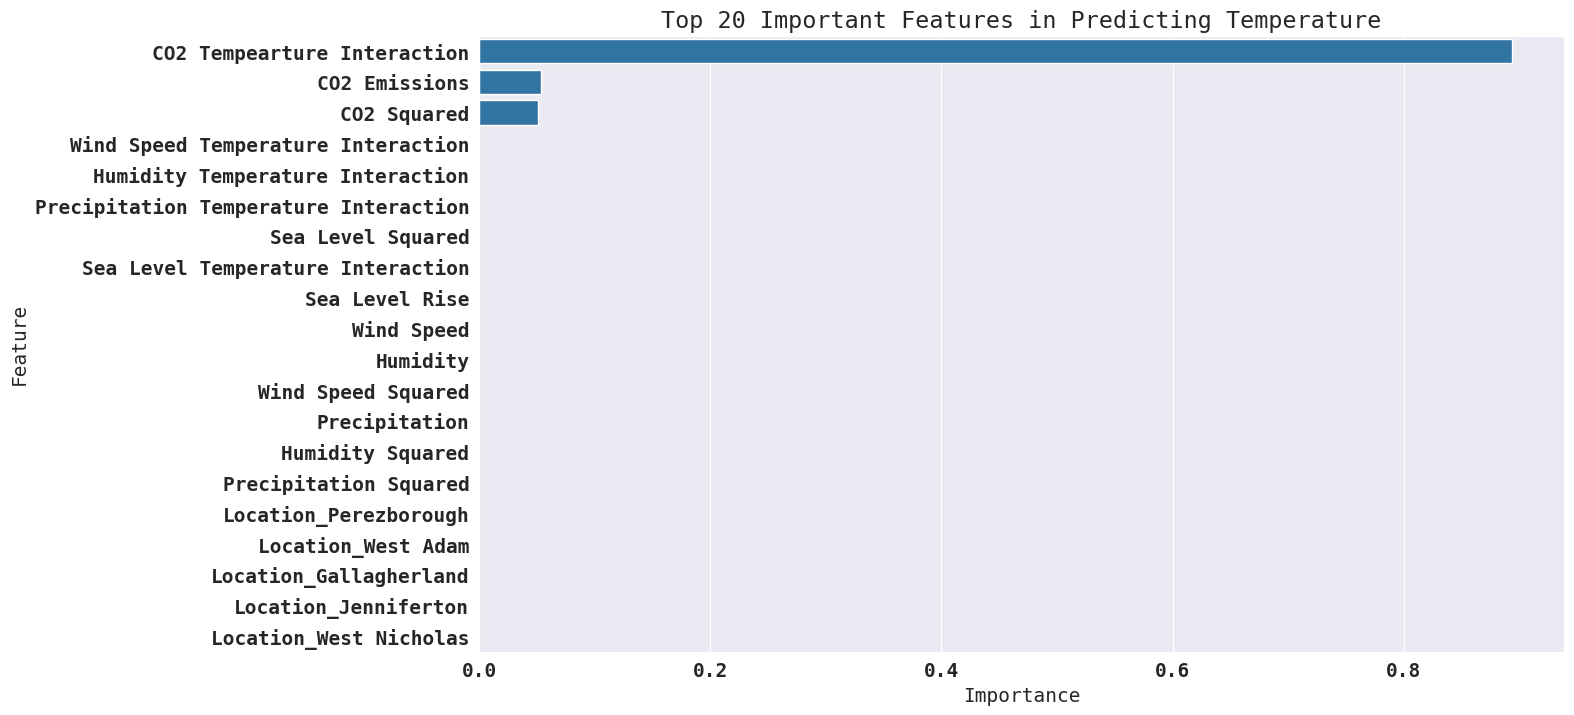

In [128]:
# Visualize feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Important Features in Predicting Temperature')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()